## IMPORTING DEPENDENCIES

In [4]:
import torch
import torch.nn as nn  #Provides prebuilt layers like nn.Linear, nn.Conv2d, and nn.ReLU. nn = neural networks
import torch.optim as optim #Provides optimizers like SGD, Adam, RMSprop, etc., to minimize the loss function and train the model.
from torch.utils.data import random_split, DataLoader #random_split Splits datasets randomly into subsets (e.g., training, validation, test sets).
#dataloader Efficiently loads data in mini-batches during training or evaluation.

from torchvision import datasets, transforms #Provides popular datasets (e.g., MNIST, CIFAR-10, ImageNet) for quick prototyping
import torch.nn.init as init # Initialize weights with specific strategies (e.g., Xavier, He).
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.tensorboard import SummaryWriter # Provides an interface for logging training metrics and visualizations to TensorBoard.

## GPU CHECKING

In [5]:
# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


## LOADING DATA

In [6]:
# Step 1: Load the MNIST dataset and apply transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Normalizing MNIST with mean and std
])
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

#### Summary of above code:

This code prepares the MNIST dataset with:

Tensor conversion: Converts images into PyTorch tensors scaled to [0, 1].

Normalization: Standardizes pixel values using dataset-specific mean and std.


### VISUALIZING SAMPLES OF THE DATASET

In [7]:
import matplotlib.pyplot as plt

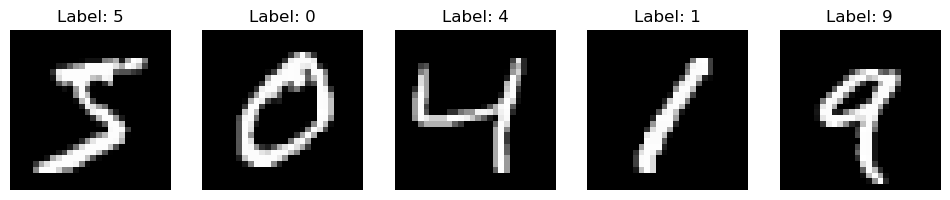

In [8]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
    image, label = mnist_dataset[i]
    axs[i].imshow(image.squeeze(), cmap='gray')
    axs[i].set_title(f'Label: {label}')
    axs[i].axis('off')
plt.show()

### DATA SPLITTING

In [9]:
# Step 2: Split the dataset into training, validation, and test sets
train_size = int(0.6 * len(mnist_dataset))
val_size = int(0.2 * len(mnist_dataset))
test_size = len(mnist_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(mnist_dataset, [train_size, val_size, test_size])

### DATA LOADERS CREATION

In [10]:
# Step 3: Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### NEURAL NETWORK MODEL

In [11]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, init_type='xavier_uniform', activation_func=torch.relu, use_dropout=False, dropout_prob=0.5, use_batch_norm=False):
        super(NeuralNet, self).__init__()

        # Define layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.fc5 = nn.Linear(hidden_size, hidden_size)
        self.fc6 = nn.Linear(hidden_size, output_size)  # Output layer

        # Optional Batch Normalization
        self.use_batch_norm = use_batch_norm
        if self.use_batch_norm:
            self.bn1 = nn.BatchNorm1d(hidden_size)
            self.bn2 = nn.BatchNorm1d(hidden_size)
            self.bn3 = nn.BatchNorm1d(hidden_size)
            self.bn4 = nn.BatchNorm1d(hidden_size)
            self.bn5 = nn.BatchNorm1d(hidden_size)

        # Optional Dropout
        self.use_dropout = use_dropout
        if self.use_dropout:
            self.dropout = nn.Dropout(dropout_prob)

        # Set activation function
        self.activation_func = activation_func

        # Apply initialization based on the selected type
        self.apply_initialization(init_type)

    # Function to apply weight initialization
    def apply_initialization(self, init_type):
        # Initialize weights based on the chosen technique
        for layer in [self.fc1, self.fc2, self.fc3, self.fc4, self.fc5, self.fc6]:
            if init_type == 'xavier_uniform':
                init.xavier_uniform_(layer.weight)
            elif init_type == 'xavier_normal':
                init.xavier_normal_(layer.weight)
            elif init_type == 'he_uniform':
                init.kaiming_uniform_(layer.weight, nonlinearity='relu')
            elif init_type == 'he_normal':
                init.kaiming_normal_(layer.weight, nonlinearity='relu')
            else:
                raise ValueError(f"Initialization type '{init_type}' is not supported.")

        # Initialize biases with zeros
        for layer in [self.fc1, self.fc2, self.fc3, self.fc4, self.fc5, self.fc6]:
            init.zeros_(layer.bias)

    def forward(self, x):
        # Layer 1 forward pass
        out = self.fc1(x)
        if self.use_batch_norm:
            out = self.bn1(out)
        out = self.activation_func(out)
        if self.use_dropout:
            out = self.dropout(out)

        # Layer 2 forward pass
        out = self.fc2(out)
        if self.use_batch_norm:
            out = self.bn2(out)
        out = self.activation_func(out)
        if self.use_dropout:
            out = self.dropout(out)

        # Layer 3 forward pass
        out = self.fc3(out)
        if self.use_batch_norm:
            out = self.bn3(out)
        out = self.activation_func(out)
        if self.use_dropout:
            out = self.dropout(out)

        # Layer 4 forward pass
        out = self.fc4(out)
        if self.use_batch_norm:
            out = self.bn4(out)
        out = self.activation_func(out)
        if self.use_dropout:
            out = self.dropout(out)

        # Layer 5 forward pass
        out = self.fc5(out)
        if self.use_batch_norm:
            out = self.bn5(out)
        out = self.activation_func(out)
        if self.use_dropout:
            out = self.dropout(out)

        # Output layer forward pass
        out = self.fc6(out)
        out = torch.softmax(out, dim=1)  # Apply softmax on output layer

        return out

### MODEL INITIALIZING

In [12]:
# Step 4: Instantiate the model and move it to the GPU (if available)
input_size = 28 * 28  # MNIST image size is 28x28 pixels
hidden_size = 256
output_size = 10  # 10 classes for MNIST digits (0-9)
# Define activation function, for example, using 'relu' as a placeholder (we'll adjust this based on combinations in training loop)
activation = 'relu'

model = NeuralNet(
    input_size,
    hidden_size,
    output_size,
    init_type='xavier_uniform',
    activation_func=activation,  # New activation parameter
    use_dropout=True,
    dropout_prob=0.5,
    use_batch_norm=True
)

model = model.to(device)  # Move model to GPU if available

### SETTING LOSS FUNCTION & OPTIMIZER

In [13]:
# Step 5: Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### TRAIN-VALIDATION FUNCTION

In [14]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        # Training phase
        for images, labels in train_loader:
            images = images.view(-1, 28 * 28).to(device)  # Flatten the images and move to the device
            labels = labels.to(device)  # Move labels to the device

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        # Calculate training loss and accuracy
        train_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct_train / total_train
        train_losses.append(train_loss)

        # Validation phase
        model.eval()  # Set the model to evaluation mode
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images = images.view(-1, 28 * 28).to(device)  # Move validation images to the device
                labels = labels.to(device)  # Move validation labels to the device
                outputs = model(images)
                loss = criterion(outputs, labels)  # Calculate validation loss
                val_loss += loss.item()  # Accumulate validation loss
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        # Calculate validation loss and accuracy
        val_loss /= len(val_loader)
        val_accuracy = 100 * correct_val / total_val
        val_losses.append(val_loss)

        # Print statistics
        print(f"Epoch [{epoch + 1}/{num_epochs}], "
              f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Accuracy: {train_accuracy:.2f}%, Validation Accuracy: {val_accuracy:.2f}%")

    return train_losses, val_losses

### EVALUATION FUNCTION

In [15]:
def evaluate_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient calculation for testing
        for images, labels in test_loader:
            images = images.view(-1, 28 * 28).to(device)  # Flatten the images
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    print(f'Test Accuracy: {test_accuracy:.2f}%')
    return test_accuracy

### TEST CASES


Training with Init: xavier_uniform, Activation: sigmoid, Dropout: False, BatchNorm: False
Epoch [1/10], Train Loss: 1.7072, Val Loss: 1.6210, Train Accuracy: 75.44%, Validation Accuracy: 83.88%
Epoch [2/10], Train Loss: 1.5510, Val Loss: 1.5277, Train Accuracy: 91.01%, Validation Accuracy: 93.41%
Epoch [3/10], Train Loss: 1.5279, Val Loss: 1.5301, Train Accuracy: 93.31%, Validation Accuracy: 93.10%
Epoch [4/10], Train Loss: 1.5201, Val Loss: 1.5204, Train Accuracy: 94.08%, Validation Accuracy: 94.03%
Epoch [5/10], Train Loss: 1.5230, Val Loss: 1.5291, Train Accuracy: 93.79%, Validation Accuracy: 93.29%
Epoch [6/10], Train Loss: 1.5179, Val Loss: 1.5230, Train Accuracy: 94.32%, Validation Accuracy: 93.79%
Epoch [7/10], Train Loss: 1.5227, Val Loss: 1.5207, Train Accuracy: 93.82%, Validation Accuracy: 94.00%
Epoch [8/10], Train Loss: 1.5195, Val Loss: 1.5330, Train Accuracy: 94.14%, Validation Accuracy: 92.78%
Epoch [9/10], Train Loss: 1.5247, Val Loss: 1.5284, Train Accuracy: 93.61%, V

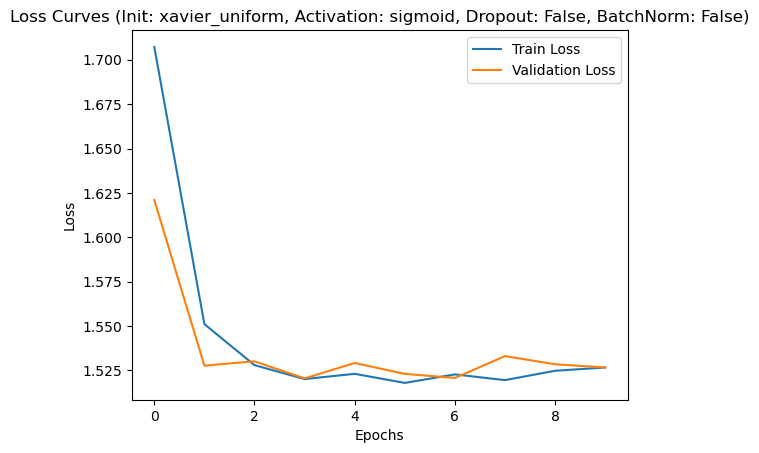

Test Accuracy: 93.44%
Init: xavier_uniform, Activation: sigmoid, Dropout: False, BatchNorm: False - Test Accuracy: 93.44%

Training with Init: xavier_uniform, Activation: sigmoid, Dropout: False, BatchNorm: True
Epoch [1/10], Train Loss: 1.5856, Val Loss: 1.5215, Train Accuracy: 88.78%, Validation Accuracy: 94.28%
Epoch [2/10], Train Loss: 1.5181, Val Loss: 1.5109, Train Accuracy: 94.53%, Validation Accuracy: 95.13%
Epoch [3/10], Train Loss: 1.5075, Val Loss: 1.5081, Train Accuracy: 95.53%, Validation Accuracy: 95.47%
Epoch [4/10], Train Loss: 1.5033, Val Loss: 1.5001, Train Accuracy: 95.91%, Validation Accuracy: 96.16%
Epoch [5/10], Train Loss: 1.4999, Val Loss: 1.4975, Train Accuracy: 96.18%, Validation Accuracy: 96.46%
Epoch [6/10], Train Loss: 1.4957, Val Loss: 1.4943, Train Accuracy: 96.61%, Validation Accuracy: 96.76%
Epoch [7/10], Train Loss: 1.4949, Val Loss: 1.4993, Train Accuracy: 96.68%, Validation Accuracy: 96.19%
Epoch [8/10], Train Loss: 1.4920, Val Loss: 1.4965, Train Ac

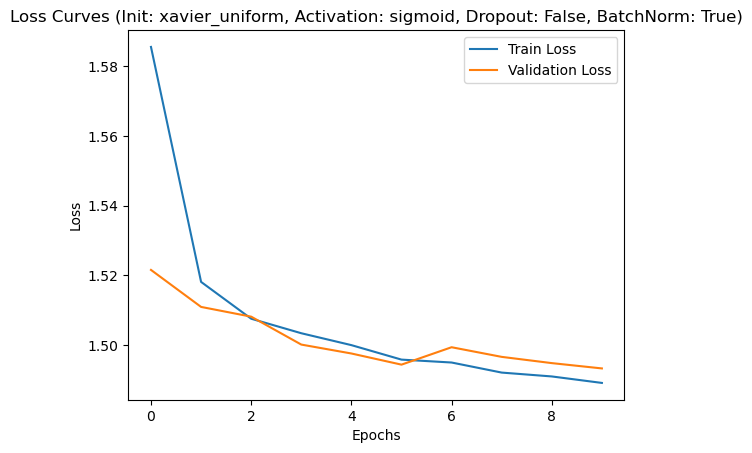

Test Accuracy: 96.58%
Init: xavier_uniform, Activation: sigmoid, Dropout: False, BatchNorm: True - Test Accuracy: 96.58%

Training with Init: xavier_uniform, Activation: sigmoid, Dropout: True, BatchNorm: False
Epoch [1/10], Train Loss: 2.1142, Val Loss: 1.9803, Train Accuracy: 31.85%, Validation Accuracy: 50.52%
Epoch [2/10], Train Loss: 1.9377, Val Loss: 1.8127, Train Accuracy: 51.81%, Validation Accuracy: 64.74%
Epoch [3/10], Train Loss: 1.8341, Val Loss: 1.7469, Train Accuracy: 62.32%, Validation Accuracy: 71.47%
Epoch [4/10], Train Loss: 1.7861, Val Loss: 1.6861, Train Accuracy: 67.59%, Validation Accuracy: 77.60%
Epoch [5/10], Train Loss: 1.7663, Val Loss: 1.6666, Train Accuracy: 69.59%, Validation Accuracy: 79.25%
Epoch [6/10], Train Loss: 1.7369, Val Loss: 1.6070, Train Accuracy: 72.46%, Validation Accuracy: 85.37%
Epoch [7/10], Train Loss: 1.7171, Val Loss: 1.5874, Train Accuracy: 74.41%, Validation Accuracy: 87.36%
Epoch [8/10], Train Loss: 1.6987, Val Loss: 1.5844, Train Acc

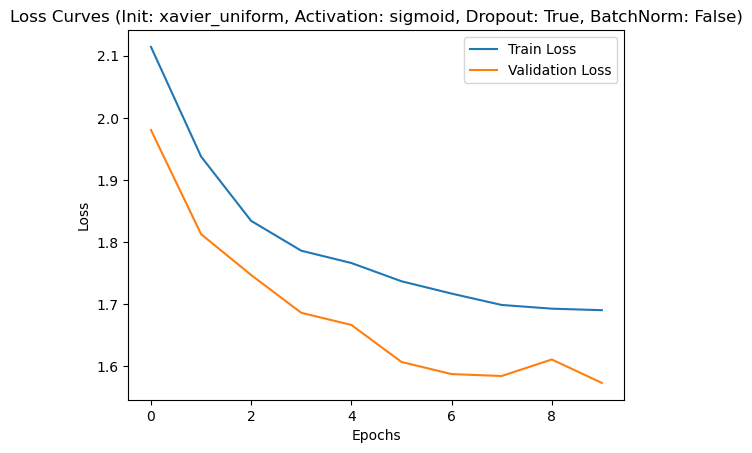

Test Accuracy: 88.87%
Init: xavier_uniform, Activation: sigmoid, Dropout: True, BatchNorm: False - Test Accuracy: 88.87%

Training with Init: xavier_uniform, Activation: sigmoid, Dropout: True, BatchNorm: True
Epoch [1/10], Train Loss: 2.0183, Val Loss: 1.6695, Train Accuracy: 44.98%, Validation Accuracy: 79.67%
Epoch [2/10], Train Loss: 1.7246, Val Loss: 1.6231, Train Accuracy: 74.67%, Validation Accuracy: 83.78%
Epoch [3/10], Train Loss: 1.6784, Val Loss: 1.6168, Train Accuracy: 78.74%, Validation Accuracy: 84.03%
Epoch [4/10], Train Loss: 1.6517, Val Loss: 1.5516, Train Accuracy: 81.32%, Validation Accuracy: 91.06%
Epoch [5/10], Train Loss: 1.6182, Val Loss: 1.5425, Train Accuracy: 84.67%, Validation Accuracy: 91.83%
Epoch [6/10], Train Loss: 1.6013, Val Loss: 1.5348, Train Accuracy: 86.27%, Validation Accuracy: 92.58%
Epoch [7/10], Train Loss: 1.5920, Val Loss: 1.5340, Train Accuracy: 87.16%, Validation Accuracy: 92.77%
Epoch [8/10], Train Loss: 1.5863, Val Loss: 1.5310, Train Accu

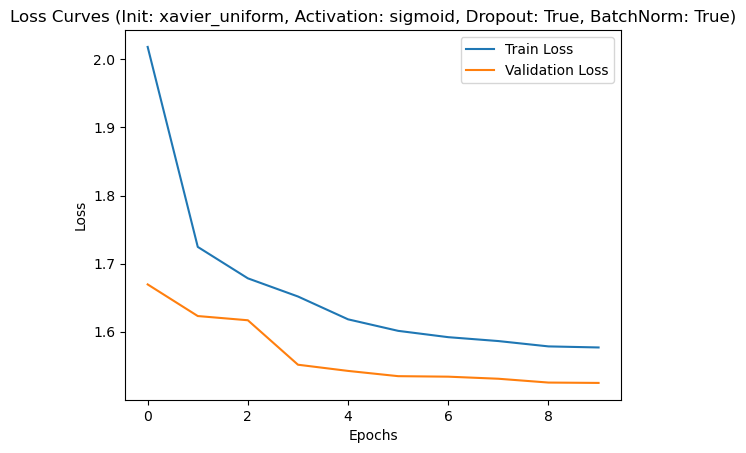

Test Accuracy: 93.35%
Init: xavier_uniform, Activation: sigmoid, Dropout: True, BatchNorm: True - Test Accuracy: 93.35%

Training with Init: xavier_uniform, Activation: tanh, Dropout: False, BatchNorm: False
Epoch [1/10], Train Loss: 1.6583, Val Loss: 1.6150, Train Accuracy: 80.53%, Validation Accuracy: 84.54%
Epoch [2/10], Train Loss: 1.5691, Val Loss: 1.5472, Train Accuracy: 89.19%, Validation Accuracy: 91.42%
Epoch [3/10], Train Loss: 1.5304, Val Loss: 1.5267, Train Accuracy: 93.07%, Validation Accuracy: 93.37%
Epoch [4/10], Train Loss: 1.5270, Val Loss: 1.5339, Train Accuracy: 93.39%, Validation Accuracy: 92.72%
Epoch [5/10], Train Loss: 1.5187, Val Loss: 1.5199, Train Accuracy: 94.24%, Validation Accuracy: 94.12%
Epoch [6/10], Train Loss: 1.5233, Val Loss: 1.5552, Train Accuracy: 93.76%, Validation Accuracy: 90.59%
Epoch [7/10], Train Loss: 1.5261, Val Loss: 1.5244, Train Accuracy: 93.49%, Validation Accuracy: 93.65%
Epoch [8/10], Train Loss: 1.5302, Val Loss: 1.5489, Train Accura

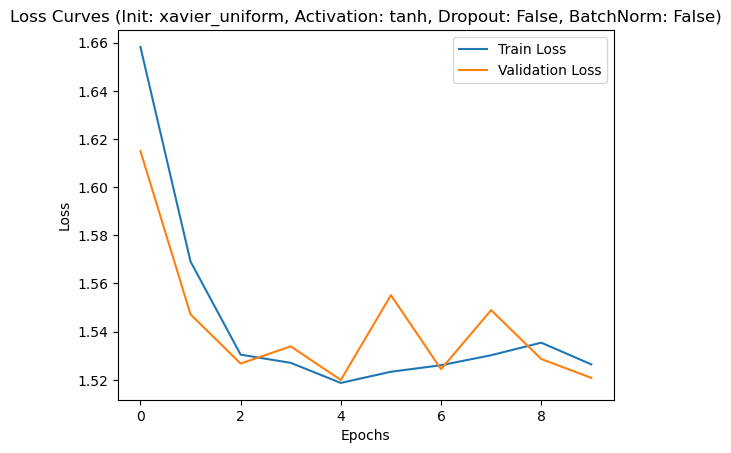

Test Accuracy: 93.91%
Init: xavier_uniform, Activation: tanh, Dropout: False, BatchNorm: False - Test Accuracy: 93.91%

Training with Init: xavier_uniform, Activation: tanh, Dropout: False, BatchNorm: True
Epoch [1/10], Train Loss: 1.5832, Val Loss: 1.5130, Train Accuracy: 89.18%, Validation Accuracy: 94.97%
Epoch [2/10], Train Loss: 1.5187, Val Loss: 1.5059, Train Accuracy: 94.50%, Validation Accuracy: 95.58%
Epoch [3/10], Train Loss: 1.5071, Val Loss: 1.5057, Train Accuracy: 95.57%, Validation Accuracy: 95.62%
Epoch [4/10], Train Loss: 1.5033, Val Loss: 1.4998, Train Accuracy: 95.89%, Validation Accuracy: 96.17%
Epoch [5/10], Train Loss: 1.4971, Val Loss: 1.4957, Train Accuracy: 96.49%, Validation Accuracy: 96.58%
Epoch [6/10], Train Loss: 1.4945, Val Loss: 1.4933, Train Accuracy: 96.74%, Validation Accuracy: 96.83%
Epoch [7/10], Train Loss: 1.4917, Val Loss: 1.4921, Train Accuracy: 96.97%, Validation Accuracy: 96.97%
Epoch [8/10], Train Loss: 1.4925, Val Loss: 1.4931, Train Accuracy

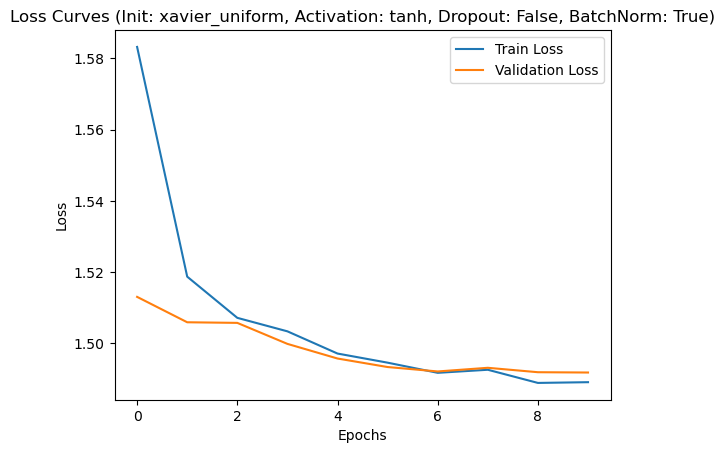

Test Accuracy: 96.97%
Init: xavier_uniform, Activation: tanh, Dropout: False, BatchNorm: True - Test Accuracy: 96.97%

Training with Init: xavier_uniform, Activation: tanh, Dropout: True, BatchNorm: False
Epoch [1/10], Train Loss: 2.0833, Val Loss: 1.8195, Train Accuracy: 35.94%, Validation Accuracy: 62.46%
Epoch [2/10], Train Loss: 1.8124, Val Loss: 1.6882, Train Accuracy: 65.44%, Validation Accuracy: 77.58%
Epoch [3/10], Train Loss: 1.7058, Val Loss: 1.6138, Train Accuracy: 75.53%, Validation Accuracy: 84.88%
Epoch [4/10], Train Loss: 1.6677, Val Loss: 1.6071, Train Accuracy: 79.43%, Validation Accuracy: 85.40%
Epoch [5/10], Train Loss: 1.6409, Val Loss: 1.5742, Train Accuracy: 82.06%, Validation Accuracy: 88.69%
Epoch [6/10], Train Loss: 1.6310, Val Loss: 1.5686, Train Accuracy: 83.07%, Validation Accuracy: 89.23%
Epoch [7/10], Train Loss: 1.6294, Val Loss: 1.5592, Train Accuracy: 83.14%, Validation Accuracy: 90.17%
Epoch [8/10], Train Loss: 1.6201, Val Loss: 1.5658, Train Accuracy:

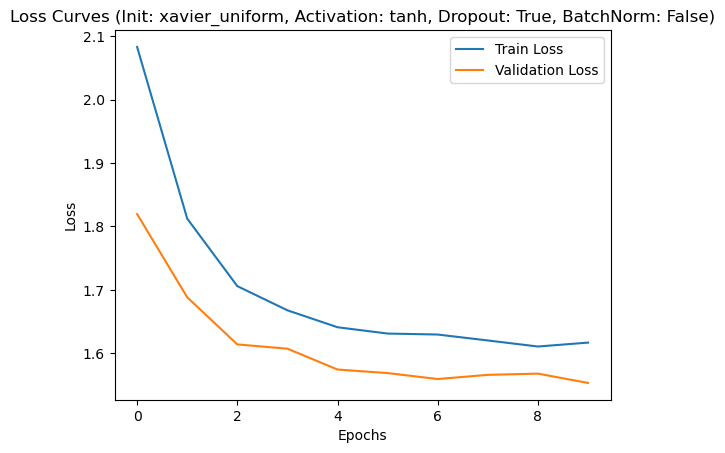

Test Accuracy: 90.89%
Init: xavier_uniform, Activation: tanh, Dropout: True, BatchNorm: False - Test Accuracy: 90.89%

Training with Init: xavier_uniform, Activation: tanh, Dropout: True, BatchNorm: True
Epoch [1/10], Train Loss: 2.0023, Val Loss: 1.6557, Train Accuracy: 46.72%, Validation Accuracy: 81.02%
Epoch [2/10], Train Loss: 1.7189, Val Loss: 1.6246, Train Accuracy: 75.28%, Validation Accuracy: 83.56%
Epoch [3/10], Train Loss: 1.6727, Val Loss: 1.5694, Train Accuracy: 79.51%, Validation Accuracy: 89.21%
Epoch [4/10], Train Loss: 1.6353, Val Loss: 1.5470, Train Accuracy: 83.11%, Validation Accuracy: 91.42%
Epoch [5/10], Train Loss: 1.6119, Val Loss: 1.5377, Train Accuracy: 85.21%, Validation Accuracy: 92.34%
Epoch [6/10], Train Loss: 1.6004, Val Loss: 1.5353, Train Accuracy: 86.32%, Validation Accuracy: 92.58%
Epoch [7/10], Train Loss: 1.5895, Val Loss: 1.5305, Train Accuracy: 87.34%, Validation Accuracy: 93.04%
Epoch [8/10], Train Loss: 1.5875, Val Loss: 1.5285, Train Accuracy: 

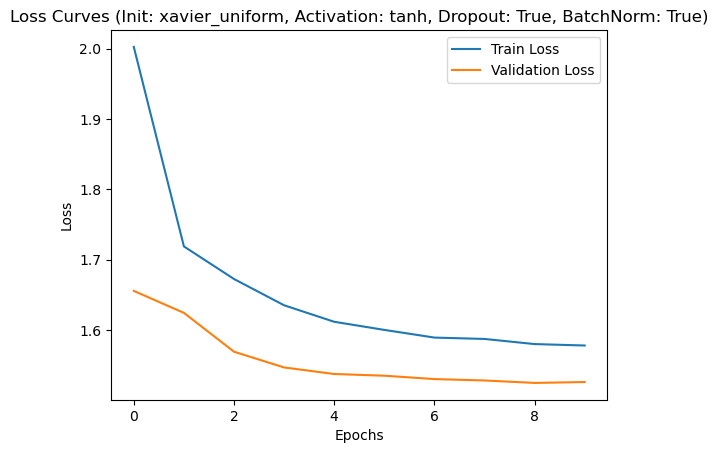

Test Accuracy: 93.28%
Init: xavier_uniform, Activation: tanh, Dropout: True, BatchNorm: True - Test Accuracy: 93.28%

Training with Init: xavier_uniform, Activation: relu, Dropout: False, BatchNorm: False
Epoch [1/10], Train Loss: 1.6030, Val Loss: 1.5414, Train Accuracy: 86.24%, Validation Accuracy: 92.09%
Epoch [2/10], Train Loss: 1.5324, Val Loss: 1.5435, Train Accuracy: 92.92%, Validation Accuracy: 91.78%
Epoch [3/10], Train Loss: 1.5233, Val Loss: 1.5533, Train Accuracy: 93.78%, Validation Accuracy: 90.78%
Epoch [4/10], Train Loss: 1.5220, Val Loss: 1.5450, Train Accuracy: 93.89%, Validation Accuracy: 91.60%
Epoch [5/10], Train Loss: 1.5195, Val Loss: 1.5223, Train Accuracy: 94.14%, Validation Accuracy: 93.85%
Epoch [6/10], Train Loss: 1.5206, Val Loss: 1.5321, Train Accuracy: 94.03%, Validation Accuracy: 92.83%
Epoch [7/10], Train Loss: 1.5217, Val Loss: 1.5200, Train Accuracy: 93.95%, Validation Accuracy: 94.12%
Epoch [8/10], Train Loss: 1.5232, Val Loss: 1.5223, Train Accuracy:

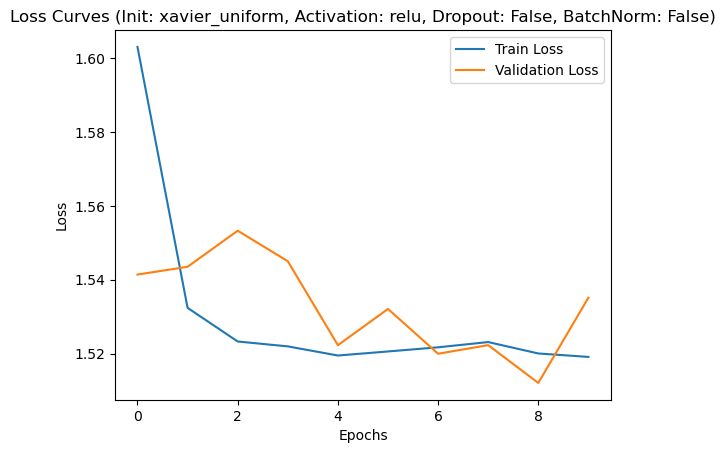

Test Accuracy: 92.98%
Init: xavier_uniform, Activation: relu, Dropout: False, BatchNorm: False - Test Accuracy: 92.98%

Training with Init: xavier_uniform, Activation: relu, Dropout: False, BatchNorm: True
Epoch [1/10], Train Loss: 1.5846, Val Loss: 1.5171, Train Accuracy: 88.95%, Validation Accuracy: 94.67%
Epoch [2/10], Train Loss: 1.5178, Val Loss: 1.5036, Train Accuracy: 94.57%, Validation Accuracy: 95.88%
Epoch [3/10], Train Loss: 1.5079, Val Loss: 1.5026, Train Accuracy: 95.48%, Validation Accuracy: 96.01%
Epoch [4/10], Train Loss: 1.5032, Val Loss: 1.4990, Train Accuracy: 95.91%, Validation Accuracy: 96.27%
Epoch [5/10], Train Loss: 1.4979, Val Loss: 1.4999, Train Accuracy: 96.44%, Validation Accuracy: 96.20%
Epoch [6/10], Train Loss: 1.4966, Val Loss: 1.4974, Train Accuracy: 96.52%, Validation Accuracy: 96.41%
Epoch [7/10], Train Loss: 1.4925, Val Loss: 1.4953, Train Accuracy: 96.92%, Validation Accuracy: 96.62%
Epoch [8/10], Train Loss: 1.4910, Val Loss: 1.4941, Train Accuracy

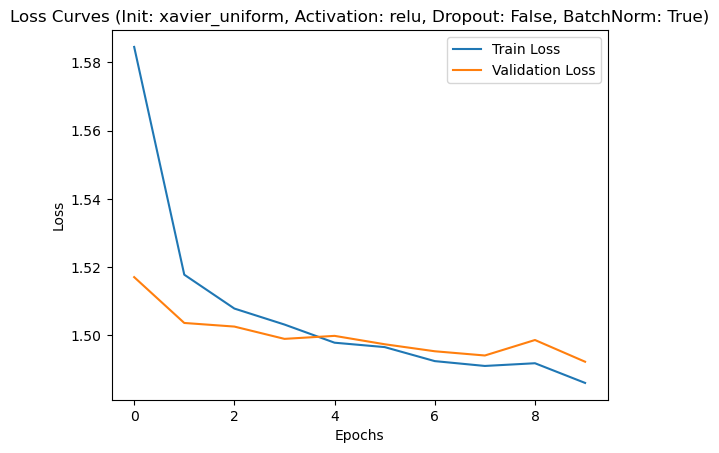

Test Accuracy: 97.05%
Init: xavier_uniform, Activation: relu, Dropout: False, BatchNorm: True - Test Accuracy: 97.05%

Training with Init: xavier_uniform, Activation: relu, Dropout: True, BatchNorm: False
Epoch [1/10], Train Loss: 2.0580, Val Loss: 1.8060, Train Accuracy: 38.47%, Validation Accuracy: 67.61%
Epoch [2/10], Train Loss: 1.7651, Val Loss: 1.6451, Train Accuracy: 70.16%, Validation Accuracy: 81.89%
Epoch [3/10], Train Loss: 1.6816, Val Loss: 1.5768, Train Accuracy: 78.06%, Validation Accuracy: 88.42%
Epoch [4/10], Train Loss: 1.6430, Val Loss: 1.5673, Train Accuracy: 81.88%, Validation Accuracy: 89.32%
Epoch [5/10], Train Loss: 1.6361, Val Loss: 1.5719, Train Accuracy: 82.53%, Validation Accuracy: 88.92%
Epoch [6/10], Train Loss: 1.6344, Val Loss: 1.5686, Train Accuracy: 82.67%, Validation Accuracy: 89.32%
Epoch [7/10], Train Loss: 1.6311, Val Loss: 1.5638, Train Accuracy: 83.03%, Validation Accuracy: 89.71%
Epoch [8/10], Train Loss: 1.6284, Val Loss: 1.5695, Train Accuracy:

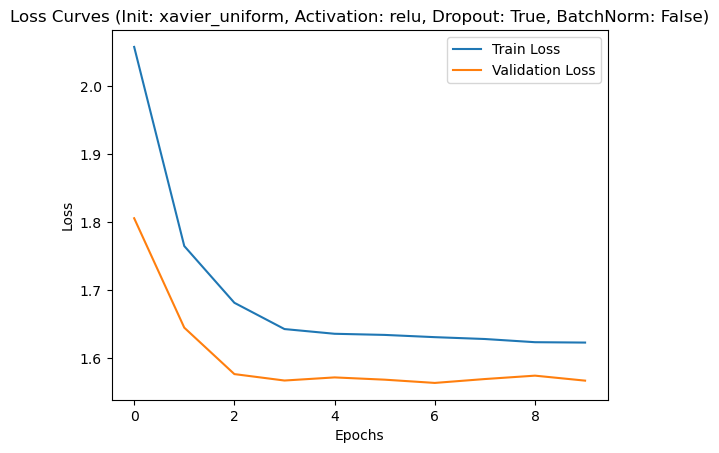

Test Accuracy: 89.17%
Init: xavier_uniform, Activation: relu, Dropout: True, BatchNorm: False - Test Accuracy: 89.17%

Training with Init: xavier_uniform, Activation: relu, Dropout: True, BatchNorm: True
Epoch [1/10], Train Loss: 2.0131, Val Loss: 1.7546, Train Accuracy: 45.03%, Validation Accuracy: 71.13%
Epoch [2/10], Train Loss: 1.7858, Val Loss: 1.7028, Train Accuracy: 68.24%, Validation Accuracy: 75.36%
Epoch [3/10], Train Loss: 1.7188, Val Loss: 1.5644, Train Accuracy: 74.97%, Validation Accuracy: 89.81%
Epoch [4/10], Train Loss: 1.6390, Val Loss: 1.5429, Train Accuracy: 82.81%, Validation Accuracy: 91.80%
Epoch [5/10], Train Loss: 1.6121, Val Loss: 1.5394, Train Accuracy: 85.32%, Validation Accuracy: 92.12%
Epoch [6/10], Train Loss: 1.5983, Val Loss: 1.5339, Train Accuracy: 86.54%, Validation Accuracy: 92.72%
Epoch [7/10], Train Loss: 1.5892, Val Loss: 1.5295, Train Accuracy: 87.42%, Validation Accuracy: 93.14%
Epoch [8/10], Train Loss: 1.5855, Val Loss: 1.5282, Train Accuracy: 

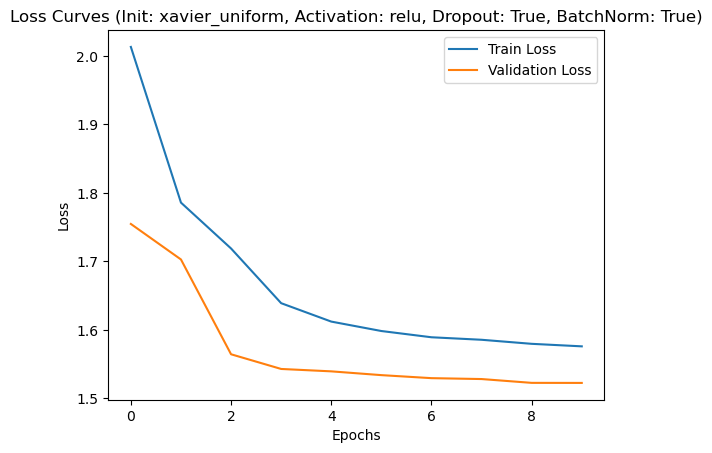

Test Accuracy: 93.56%
Init: xavier_uniform, Activation: relu, Dropout: True, BatchNorm: True - Test Accuracy: 93.56%

Training with Init: xavier_normal, Activation: sigmoid, Dropout: False, BatchNorm: False
Epoch [1/10], Train Loss: 1.6428, Val Loss: 1.5395, Train Accuracy: 82.18%, Validation Accuracy: 92.25%
Epoch [2/10], Train Loss: 1.5314, Val Loss: 1.5393, Train Accuracy: 93.02%, Validation Accuracy: 92.14%
Epoch [3/10], Train Loss: 1.5272, Val Loss: 1.5276, Train Accuracy: 93.37%, Validation Accuracy: 93.33%
Epoch [4/10], Train Loss: 1.5265, Val Loss: 1.5474, Train Accuracy: 93.47%, Validation Accuracy: 91.35%
Epoch [5/10], Train Loss: 1.5246, Val Loss: 1.5230, Train Accuracy: 93.64%, Validation Accuracy: 93.83%
Epoch [6/10], Train Loss: 1.5226, Val Loss: 1.5249, Train Accuracy: 93.84%, Validation Accuracy: 93.58%
Epoch [7/10], Train Loss: 1.5223, Val Loss: 1.5358, Train Accuracy: 93.91%, Validation Accuracy: 92.48%
Epoch [8/10], Train Loss: 1.5276, Val Loss: 1.5273, Train Accurac

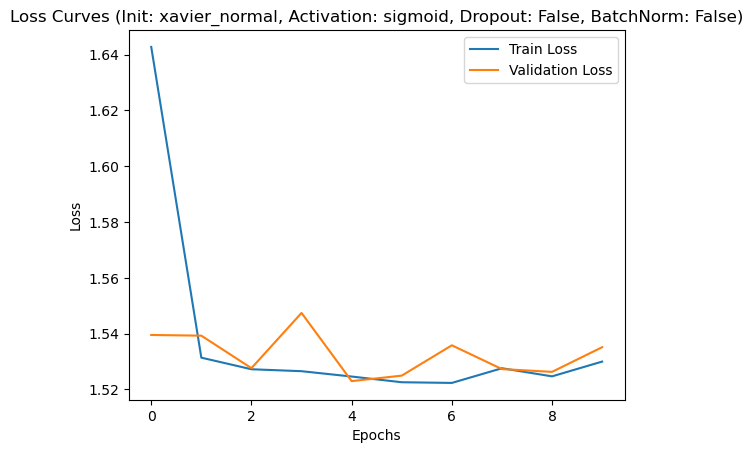

Test Accuracy: 92.34%
Init: xavier_normal, Activation: sigmoid, Dropout: False, BatchNorm: False - Test Accuracy: 92.34%

Training with Init: xavier_normal, Activation: sigmoid, Dropout: False, BatchNorm: True
Epoch [1/10], Train Loss: 1.5808, Val Loss: 1.5221, Train Accuracy: 89.49%, Validation Accuracy: 94.28%
Epoch [2/10], Train Loss: 1.5182, Val Loss: 1.5061, Train Accuracy: 94.52%, Validation Accuracy: 95.64%
Epoch [3/10], Train Loss: 1.5073, Val Loss: 1.5031, Train Accuracy: 95.58%, Validation Accuracy: 95.93%
Epoch [4/10], Train Loss: 1.5019, Val Loss: 1.5015, Train Accuracy: 96.02%, Validation Accuracy: 96.00%
Epoch [5/10], Train Loss: 1.4981, Val Loss: 1.4994, Train Accuracy: 96.42%, Validation Accuracy: 96.28%
Epoch [6/10], Train Loss: 1.4984, Val Loss: 1.4942, Train Accuracy: 96.35%, Validation Accuracy: 96.78%
Epoch [7/10], Train Loss: 1.4933, Val Loss: 1.4944, Train Accuracy: 96.88%, Validation Accuracy: 96.70%
Epoch [8/10], Train Loss: 1.4905, Val Loss: 1.4948, Train Accu

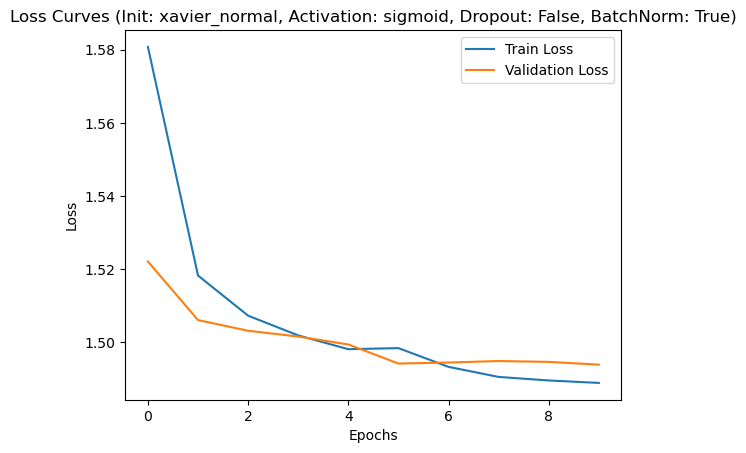

Test Accuracy: 96.88%
Init: xavier_normal, Activation: sigmoid, Dropout: False, BatchNorm: True - Test Accuracy: 96.88%

Training with Init: xavier_normal, Activation: sigmoid, Dropout: True, BatchNorm: False
Epoch [1/10], Train Loss: 2.0558, Val Loss: 1.8234, Train Accuracy: 38.70%, Validation Accuracy: 67.06%
Epoch [2/10], Train Loss: 1.7783, Val Loss: 1.6464, Train Accuracy: 68.90%, Validation Accuracy: 81.41%
Epoch [3/10], Train Loss: 1.7055, Val Loss: 1.6398, Train Accuracy: 75.58%, Validation Accuracy: 81.93%
Epoch [4/10], Train Loss: 1.6934, Val Loss: 1.6311, Train Accuracy: 76.74%, Validation Accuracy: 82.88%
Epoch [5/10], Train Loss: 1.6803, Val Loss: 1.6078, Train Accuracy: 78.08%, Validation Accuracy: 85.30%
Epoch [6/10], Train Loss: 1.6653, Val Loss: 1.5726, Train Accuracy: 79.57%, Validation Accuracy: 88.80%
Epoch [7/10], Train Loss: 1.6499, Val Loss: 1.5722, Train Accuracy: 81.11%, Validation Accuracy: 88.83%
Epoch [8/10], Train Loss: 1.6427, Val Loss: 1.5899, Train Accur

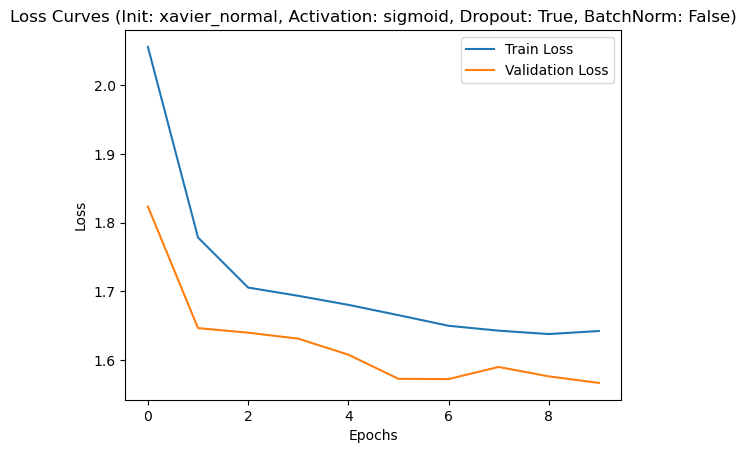

Test Accuracy: 89.56%
Init: xavier_normal, Activation: sigmoid, Dropout: True, BatchNorm: False - Test Accuracy: 89.56%

Training with Init: xavier_normal, Activation: sigmoid, Dropout: True, BatchNorm: True
Epoch [1/10], Train Loss: 2.0165, Val Loss: 1.7343, Train Accuracy: 45.08%, Validation Accuracy: 73.78%
Epoch [2/10], Train Loss: 1.7796, Val Loss: 1.6590, Train Accuracy: 69.09%, Validation Accuracy: 80.25%
Epoch [3/10], Train Loss: 1.7025, Val Loss: 1.6211, Train Accuracy: 76.48%, Validation Accuracy: 83.89%
Epoch [4/10], Train Loss: 1.6738, Val Loss: 1.6202, Train Accuracy: 79.07%, Validation Accuracy: 83.91%
Epoch [5/10], Train Loss: 1.6627, Val Loss: 1.6148, Train Accuracy: 80.10%, Validation Accuracy: 84.54%
Epoch [6/10], Train Loss: 1.6487, Val Loss: 1.5688, Train Accuracy: 81.41%, Validation Accuracy: 89.33%
Epoch [7/10], Train Loss: 1.6202, Val Loss: 1.5410, Train Accuracy: 84.31%, Validation Accuracy: 91.94%
Epoch [8/10], Train Loss: 1.5980, Val Loss: 1.5322, Train Accura

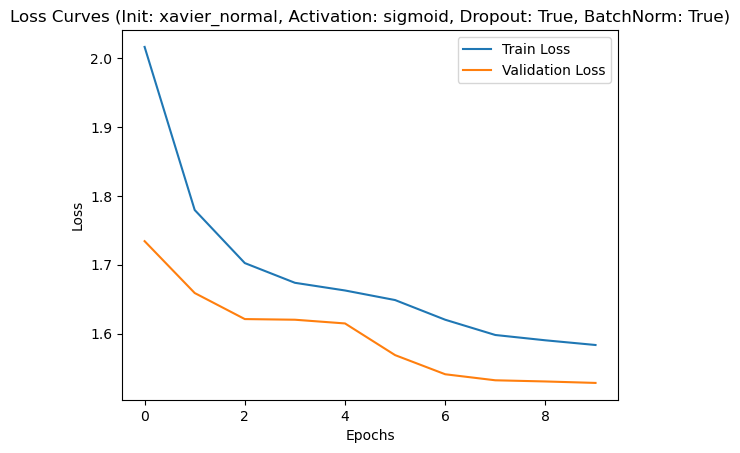

Test Accuracy: 93.20%
Init: xavier_normal, Activation: sigmoid, Dropout: True, BatchNorm: True - Test Accuracy: 93.20%

Training with Init: xavier_normal, Activation: tanh, Dropout: False, BatchNorm: False
Epoch [1/10], Train Loss: 1.6090, Val Loss: 1.5452, Train Accuracy: 85.53%, Validation Accuracy: 91.71%
Epoch [2/10], Train Loss: 1.5327, Val Loss: 1.5257, Train Accuracy: 92.87%, Validation Accuracy: 93.57%
Epoch [3/10], Train Loss: 1.5272, Val Loss: 1.5329, Train Accuracy: 93.42%, Validation Accuracy: 92.83%
Epoch [4/10], Train Loss: 1.5219, Val Loss: 1.5287, Train Accuracy: 93.91%, Validation Accuracy: 93.20%
Epoch [5/10], Train Loss: 1.5180, Val Loss: 1.5352, Train Accuracy: 94.28%, Validation Accuracy: 92.57%
Epoch [6/10], Train Loss: 1.5233, Val Loss: 1.5164, Train Accuracy: 93.76%, Validation Accuracy: 94.46%
Epoch [7/10], Train Loss: 1.5258, Val Loss: 1.5246, Train Accuracy: 93.52%, Validation Accuracy: 93.65%
Epoch [8/10], Train Loss: 1.5259, Val Loss: 1.5261, Train Accuracy

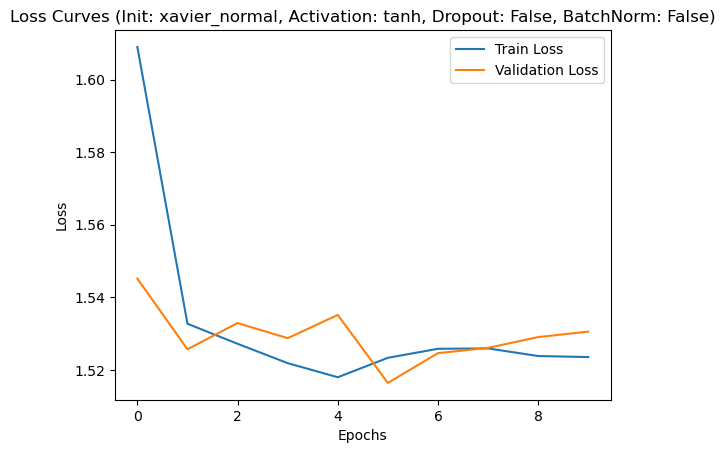

Test Accuracy: 92.99%
Init: xavier_normal, Activation: tanh, Dropout: False, BatchNorm: False - Test Accuracy: 92.99%

Training with Init: xavier_normal, Activation: tanh, Dropout: False, BatchNorm: True
Epoch [1/10], Train Loss: 1.5820, Val Loss: 1.5143, Train Accuracy: 89.12%, Validation Accuracy: 94.95%
Epoch [2/10], Train Loss: 1.5183, Val Loss: 1.5043, Train Accuracy: 94.53%, Validation Accuracy: 95.77%
Epoch [3/10], Train Loss: 1.5093, Val Loss: 1.5033, Train Accuracy: 95.33%, Validation Accuracy: 95.86%
Epoch [4/10], Train Loss: 1.5015, Val Loss: 1.4987, Train Accuracy: 96.11%, Validation Accuracy: 96.28%
Epoch [5/10], Train Loss: 1.4986, Val Loss: 1.4948, Train Accuracy: 96.36%, Validation Accuracy: 96.72%
Epoch [6/10], Train Loss: 1.4962, Val Loss: 1.4953, Train Accuracy: 96.59%, Validation Accuracy: 96.68%
Epoch [7/10], Train Loss: 1.4938, Val Loss: 1.4991, Train Accuracy: 96.81%, Validation Accuracy: 96.18%
Epoch [8/10], Train Loss: 1.4918, Val Loss: 1.4941, Train Accuracy: 

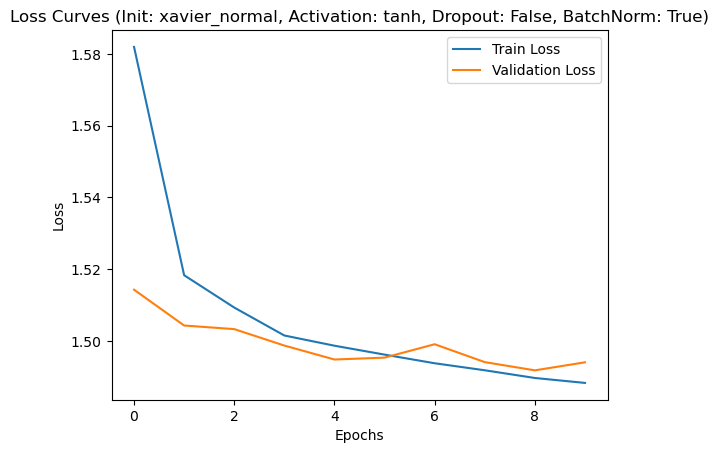

Test Accuracy: 96.67%
Init: xavier_normal, Activation: tanh, Dropout: False, BatchNorm: True - Test Accuracy: 96.67%

Training with Init: xavier_normal, Activation: tanh, Dropout: True, BatchNorm: False
Epoch [1/10], Train Loss: 2.0543, Val Loss: 1.8569, Train Accuracy: 39.54%, Validation Accuracy: 59.61%
Epoch [2/10], Train Loss: 1.8179, Val Loss: 1.6738, Train Accuracy: 64.42%, Validation Accuracy: 78.61%
Epoch [3/10], Train Loss: 1.7351, Val Loss: 1.6423, Train Accuracy: 72.66%, Validation Accuracy: 81.81%
Epoch [4/10], Train Loss: 1.7070, Val Loss: 1.5993, Train Accuracy: 75.51%, Validation Accuracy: 86.27%
Epoch [5/10], Train Loss: 1.6778, Val Loss: 1.5782, Train Accuracy: 78.41%, Validation Accuracy: 88.27%
Epoch [6/10], Train Loss: 1.6546, Val Loss: 1.5656, Train Accuracy: 80.67%, Validation Accuracy: 89.53%
Epoch [7/10], Train Loss: 1.6496, Val Loss: 1.5801, Train Accuracy: 81.16%, Validation Accuracy: 88.09%
Epoch [8/10], Train Loss: 1.6380, Val Loss: 1.5807, Train Accuracy: 8

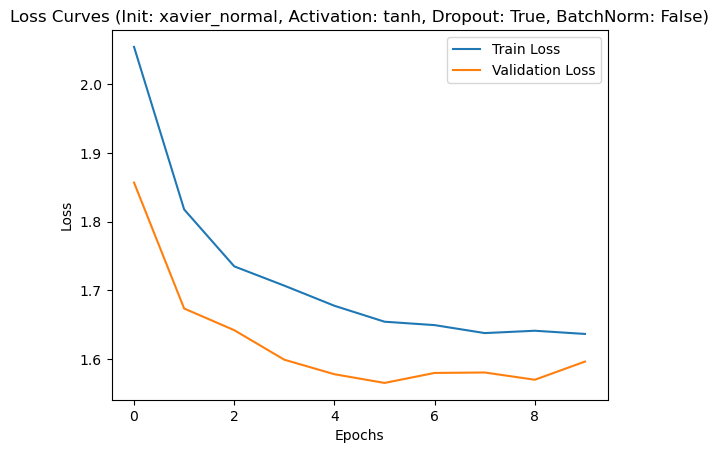

Test Accuracy: 86.24%
Init: xavier_normal, Activation: tanh, Dropout: True, BatchNorm: False - Test Accuracy: 86.24%

Training with Init: xavier_normal, Activation: tanh, Dropout: True, BatchNorm: True
Epoch [1/10], Train Loss: 2.0336, Val Loss: 1.7422, Train Accuracy: 42.96%, Validation Accuracy: 72.29%
Epoch [2/10], Train Loss: 1.7241, Val Loss: 1.5594, Train Accuracy: 75.22%, Validation Accuracy: 90.28%
Epoch [3/10], Train Loss: 1.6436, Val Loss: 1.5484, Train Accuracy: 82.35%, Validation Accuracy: 91.33%
Epoch [4/10], Train Loss: 1.6199, Val Loss: 1.5419, Train Accuracy: 84.57%, Validation Accuracy: 91.92%
Epoch [5/10], Train Loss: 1.6038, Val Loss: 1.5347, Train Accuracy: 86.03%, Validation Accuracy: 92.67%
Epoch [6/10], Train Loss: 1.5915, Val Loss: 1.5297, Train Accuracy: 87.17%, Validation Accuracy: 93.17%
Epoch [7/10], Train Loss: 1.5892, Val Loss: 1.5324, Train Accuracy: 87.38%, Validation Accuracy: 92.88%
Epoch [8/10], Train Loss: 1.5806, Val Loss: 1.5301, Train Accuracy: 88

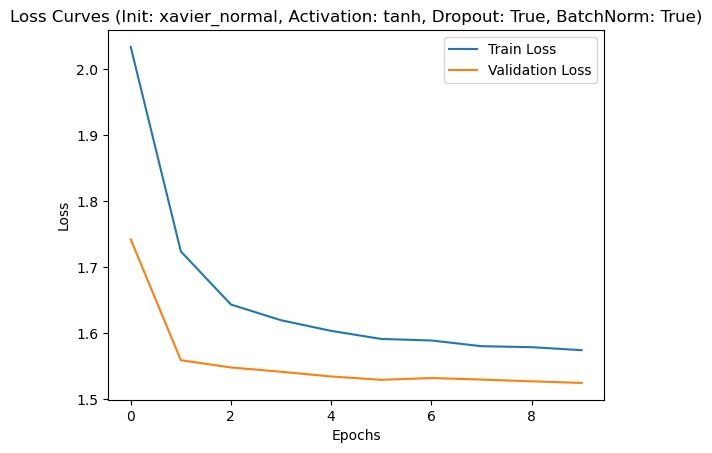

Test Accuracy: 93.56%
Init: xavier_normal, Activation: tanh, Dropout: True, BatchNorm: True - Test Accuracy: 93.56%

Training with Init: xavier_normal, Activation: relu, Dropout: False, BatchNorm: False
Epoch [1/10], Train Loss: 1.5970, Val Loss: 1.5365, Train Accuracy: 86.82%, Validation Accuracy: 92.47%
Epoch [2/10], Train Loss: 1.5289, Val Loss: 1.5245, Train Accuracy: 93.27%, Validation Accuracy: 93.75%
Epoch [3/10], Train Loss: 1.5250, Val Loss: 1.5516, Train Accuracy: 93.60%, Validation Accuracy: 90.95%
Epoch [4/10], Train Loss: 1.5204, Val Loss: 1.5351, Train Accuracy: 94.07%, Validation Accuracy: 92.58%
Epoch [5/10], Train Loss: 1.5206, Val Loss: 1.5207, Train Accuracy: 94.01%, Validation Accuracy: 94.02%
Epoch [6/10], Train Loss: 1.5185, Val Loss: 1.5160, Train Accuracy: 94.27%, Validation Accuracy: 94.53%
Epoch [7/10], Train Loss: 1.5184, Val Loss: 1.5220, Train Accuracy: 94.26%, Validation Accuracy: 93.89%
Epoch [8/10], Train Loss: 1.5200, Val Loss: 1.5531, Train Accuracy: 9

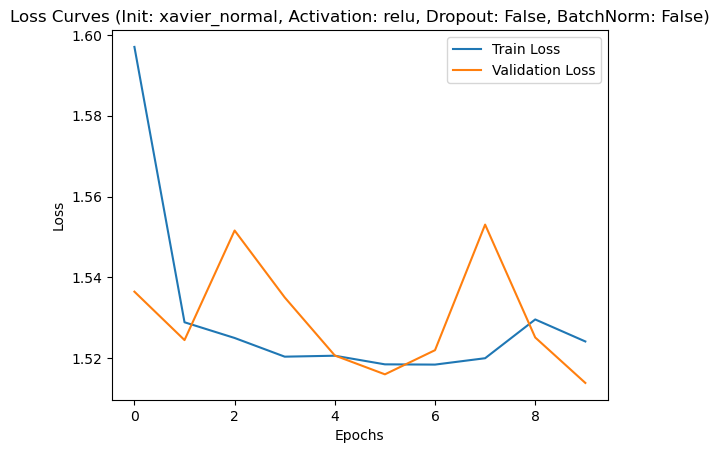

Test Accuracy: 94.66%
Init: xavier_normal, Activation: relu, Dropout: False, BatchNorm: False - Test Accuracy: 94.66%

Training with Init: xavier_normal, Activation: relu, Dropout: False, BatchNorm: True
Epoch [1/10], Train Loss: 1.5847, Val Loss: 1.5243, Train Accuracy: 89.01%, Validation Accuracy: 93.98%
Epoch [2/10], Train Loss: 1.5191, Val Loss: 1.5079, Train Accuracy: 94.44%, Validation Accuracy: 95.52%
Epoch [3/10], Train Loss: 1.5083, Val Loss: 1.5007, Train Accuracy: 95.49%, Validation Accuracy: 96.11%
Epoch [4/10], Train Loss: 1.5020, Val Loss: 1.4966, Train Accuracy: 96.04%, Validation Accuracy: 96.52%
Epoch [5/10], Train Loss: 1.4968, Val Loss: 1.4953, Train Accuracy: 96.53%, Validation Accuracy: 96.54%
Epoch [6/10], Train Loss: 1.4949, Val Loss: 1.5027, Train Accuracy: 96.68%, Validation Accuracy: 95.89%
Epoch [7/10], Train Loss: 1.4927, Val Loss: 1.4933, Train Accuracy: 96.88%, Validation Accuracy: 96.82%
Epoch [8/10], Train Loss: 1.4920, Val Loss: 1.4941, Train Accuracy: 

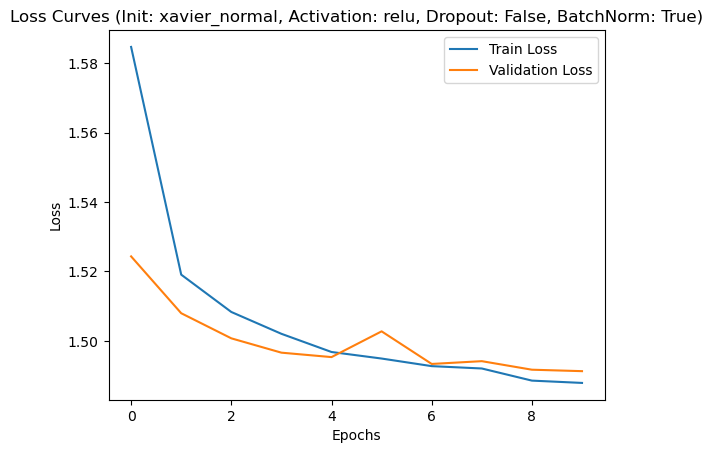

Test Accuracy: 96.99%
Init: xavier_normal, Activation: relu, Dropout: False, BatchNorm: True - Test Accuracy: 96.99%

Training with Init: xavier_normal, Activation: relu, Dropout: True, BatchNorm: False
Epoch [1/10], Train Loss: 2.1047, Val Loss: 1.8800, Train Accuracy: 33.40%, Validation Accuracy: 57.05%
Epoch [2/10], Train Loss: 1.8622, Val Loss: 1.7952, Train Accuracy: 58.89%, Validation Accuracy: 65.50%
Epoch [3/10], Train Loss: 1.8190, Val Loss: 1.7400, Train Accuracy: 63.79%, Validation Accuracy: 72.40%
Epoch [4/10], Train Loss: 1.7916, Val Loss: 1.6975, Train Accuracy: 66.61%, Validation Accuracy: 76.18%
Epoch [5/10], Train Loss: 1.7625, Val Loss: 1.6629, Train Accuracy: 69.56%, Validation Accuracy: 79.81%
Epoch [6/10], Train Loss: 1.7416, Val Loss: 1.6320, Train Accuracy: 71.94%, Validation Accuracy: 83.35%
Epoch [7/10], Train Loss: 1.7200, Val Loss: 1.6447, Train Accuracy: 74.25%, Validation Accuracy: 81.40%
Epoch [8/10], Train Loss: 1.7073, Val Loss: 1.6397, Train Accuracy: 7

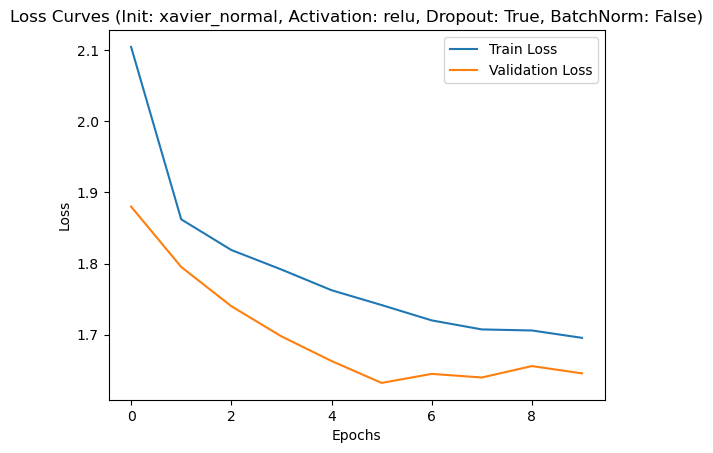

Test Accuracy: 80.58%
Init: xavier_normal, Activation: relu, Dropout: True, BatchNorm: False - Test Accuracy: 80.58%

Training with Init: xavier_normal, Activation: relu, Dropout: True, BatchNorm: True
Epoch [1/10], Train Loss: 2.0165, Val Loss: 1.7645, Train Accuracy: 44.98%, Validation Accuracy: 69.40%
Epoch [2/10], Train Loss: 1.7876, Val Loss: 1.6906, Train Accuracy: 68.01%, Validation Accuracy: 76.87%
Epoch [3/10], Train Loss: 1.7105, Val Loss: 1.6074, Train Accuracy: 75.78%, Validation Accuracy: 85.28%
Epoch [4/10], Train Loss: 1.6461, Val Loss: 1.5485, Train Accuracy: 81.97%, Validation Accuracy: 91.29%
Epoch [5/10], Train Loss: 1.6185, Val Loss: 1.5396, Train Accuracy: 84.53%, Validation Accuracy: 92.09%
Epoch [6/10], Train Loss: 1.6020, Val Loss: 1.5362, Train Accuracy: 86.17%, Validation Accuracy: 92.44%
Epoch [7/10], Train Loss: 1.5949, Val Loss: 1.5317, Train Accuracy: 86.76%, Validation Accuracy: 92.89%
Epoch [8/10], Train Loss: 1.5832, Val Loss: 1.5265, Train Accuracy: 88

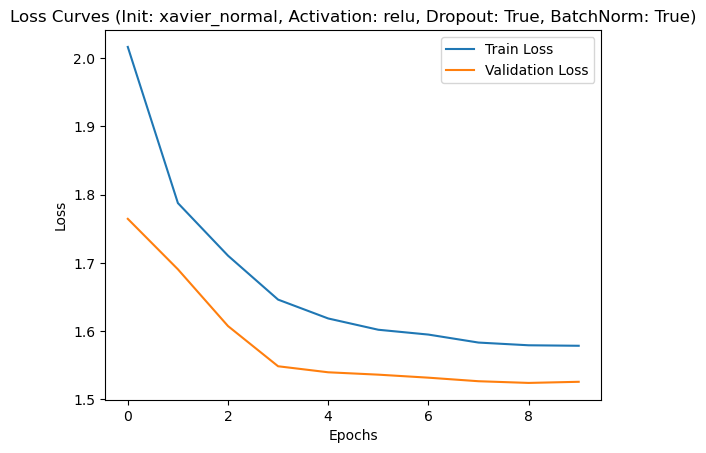

Test Accuracy: 93.28%
Init: xavier_normal, Activation: relu, Dropout: True, BatchNorm: True - Test Accuracy: 93.28%

Training with Init: he_uniform, Activation: sigmoid, Dropout: False, BatchNorm: False
Epoch [1/10], Train Loss: 1.6646, Val Loss: 1.6294, Train Accuracy: 79.68%, Validation Accuracy: 83.23%
Epoch [2/10], Train Loss: 1.6218, Val Loss: 1.6209, Train Accuracy: 83.85%, Validation Accuracy: 84.01%
Epoch [3/10], Train Loss: 1.6161, Val Loss: 1.6878, Train Accuracy: 84.47%, Validation Accuracy: 77.24%
Epoch [4/10], Train Loss: 1.6168, Val Loss: 1.6071, Train Accuracy: 84.38%, Validation Accuracy: 85.35%
Epoch [5/10], Train Loss: 1.6130, Val Loss: 1.6241, Train Accuracy: 84.79%, Validation Accuracy: 83.65%
Epoch [6/10], Train Loss: 1.6139, Val Loss: 1.6200, Train Accuracy: 84.69%, Validation Accuracy: 84.11%
Epoch [7/10], Train Loss: 1.6267, Val Loss: 1.6174, Train Accuracy: 83.43%, Validation Accuracy: 84.36%
Epoch [8/10], Train Loss: 1.6315, Val Loss: 1.6201, Train Accuracy: 8

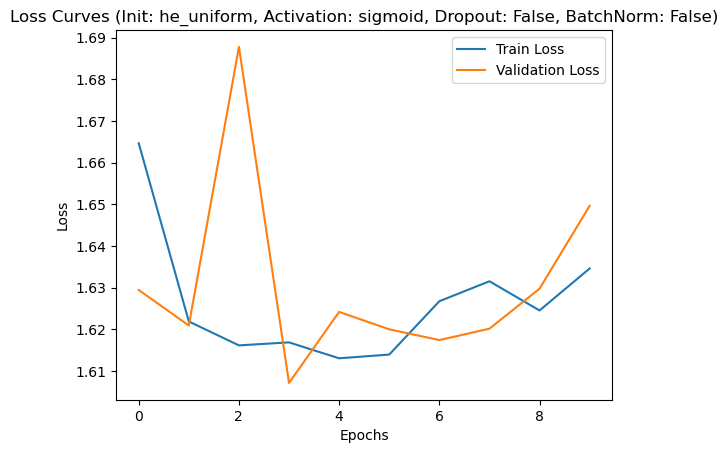

Test Accuracy: 81.43%
Init: he_uniform, Activation: sigmoid, Dropout: False, BatchNorm: False - Test Accuracy: 81.43%

Training with Init: he_uniform, Activation: sigmoid, Dropout: False, BatchNorm: True
Epoch [1/10], Train Loss: 1.5972, Val Loss: 1.5234, Train Accuracy: 87.72%, Validation Accuracy: 94.04%
Epoch [2/10], Train Loss: 1.5183, Val Loss: 1.5087, Train Accuracy: 94.55%, Validation Accuracy: 95.42%
Epoch [3/10], Train Loss: 1.5078, Val Loss: 1.4999, Train Accuracy: 95.48%, Validation Accuracy: 96.28%
Epoch [4/10], Train Loss: 1.4987, Val Loss: 1.4976, Train Accuracy: 96.42%, Validation Accuracy: 96.44%
Epoch [5/10], Train Loss: 1.4975, Val Loss: 1.4957, Train Accuracy: 96.49%, Validation Accuracy: 96.62%
Epoch [6/10], Train Loss: 1.4943, Val Loss: 1.4988, Train Accuracy: 96.79%, Validation Accuracy: 96.29%
Epoch [7/10], Train Loss: 1.4908, Val Loss: 1.4951, Train Accuracy: 97.13%, Validation Accuracy: 96.59%
Epoch [8/10], Train Loss: 1.4902, Val Loss: 1.4946, Train Accuracy: 

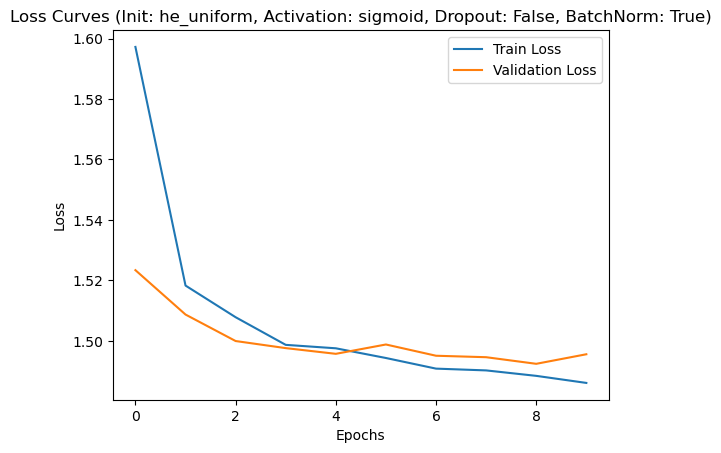

Test Accuracy: 96.54%
Init: he_uniform, Activation: sigmoid, Dropout: False, BatchNorm: True - Test Accuracy: 96.54%

Training with Init: he_uniform, Activation: sigmoid, Dropout: True, BatchNorm: False
Epoch [1/10], Train Loss: 2.2916, Val Loss: 2.1519, Train Accuracy: 16.49%, Validation Accuracy: 30.59%
Epoch [2/10], Train Loss: 2.2069, Val Loss: 2.1589, Train Accuracy: 25.21%, Validation Accuracy: 30.07%
Epoch [3/10], Train Loss: 2.1681, Val Loss: 2.1551, Train Accuracy: 29.11%, Validation Accuracy: 30.56%
Epoch [4/10], Train Loss: 2.1341, Val Loss: 2.0693, Train Accuracy: 32.58%, Validation Accuracy: 39.15%
Epoch [5/10], Train Loss: 2.0992, Val Loss: 2.0786, Train Accuracy: 36.12%, Validation Accuracy: 38.24%
Epoch [6/10], Train Loss: 2.0871, Val Loss: 2.0691, Train Accuracy: 37.35%, Validation Accuracy: 39.19%
Epoch [7/10], Train Loss: 2.0914, Val Loss: 2.0625, Train Accuracy: 36.93%, Validation Accuracy: 39.85%
Epoch [8/10], Train Loss: 2.0859, Val Loss: 2.0759, Train Accuracy: 3

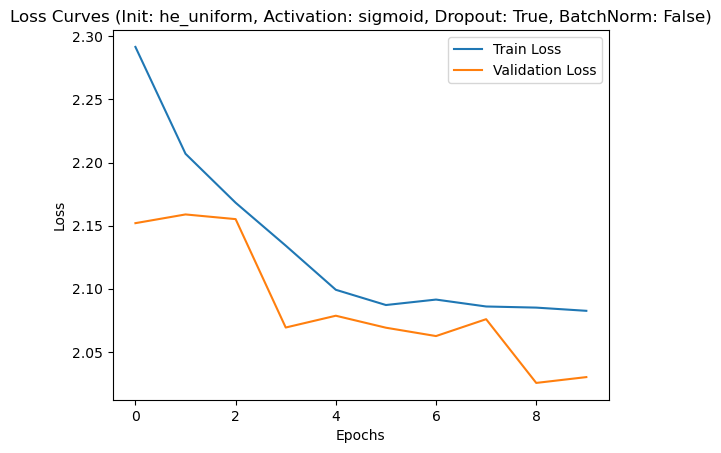

Test Accuracy: 42.74%
Init: he_uniform, Activation: sigmoid, Dropout: True, BatchNorm: False - Test Accuracy: 42.74%

Training with Init: he_uniform, Activation: sigmoid, Dropout: True, BatchNorm: True
Epoch [1/10], Train Loss: 2.0777, Val Loss: 1.7987, Train Accuracy: 38.36%, Validation Accuracy: 65.62%
Epoch [2/10], Train Loss: 1.7962, Val Loss: 1.6386, Train Accuracy: 67.69%, Validation Accuracy: 82.41%
Epoch [3/10], Train Loss: 1.7058, Val Loss: 1.6133, Train Accuracy: 76.31%, Validation Accuracy: 84.48%
Epoch [4/10], Train Loss: 1.6579, Val Loss: 1.5574, Train Accuracy: 80.98%, Validation Accuracy: 90.46%
Epoch [5/10], Train Loss: 1.6218, Val Loss: 1.5404, Train Accuracy: 84.48%, Validation Accuracy: 92.06%
Epoch [6/10], Train Loss: 1.6079, Val Loss: 1.5372, Train Accuracy: 85.72%, Validation Accuracy: 92.41%
Epoch [7/10], Train Loss: 1.5950, Val Loss: 1.5373, Train Accuracy: 86.88%, Validation Accuracy: 92.34%
Epoch [8/10], Train Loss: 1.5875, Val Loss: 1.5297, Train Accuracy: 87

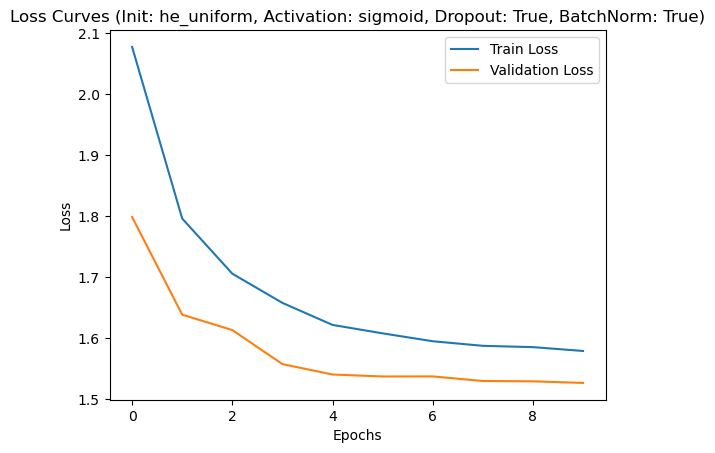

Test Accuracy: 93.30%
Init: he_uniform, Activation: sigmoid, Dropout: True, BatchNorm: True - Test Accuracy: 93.30%

Training with Init: he_uniform, Activation: tanh, Dropout: False, BatchNorm: False
Epoch [1/10], Train Loss: 1.6697, Val Loss: 1.6364, Train Accuracy: 79.29%, Validation Accuracy: 82.47%
Epoch [2/10], Train Loss: 1.6190, Val Loss: 1.6335, Train Accuracy: 84.22%, Validation Accuracy: 82.71%
Epoch [3/10], Train Loss: 1.6157, Val Loss: 1.6161, Train Accuracy: 84.48%, Validation Accuracy: 84.38%
Epoch [4/10], Train Loss: 1.6135, Val Loss: 1.6238, Train Accuracy: 84.74%, Validation Accuracy: 83.67%
Epoch [5/10], Train Loss: 1.6167, Val Loss: 1.6257, Train Accuracy: 84.39%, Validation Accuracy: 83.48%
Epoch [6/10], Train Loss: 1.6121, Val Loss: 1.6143, Train Accuracy: 84.86%, Validation Accuracy: 84.66%
Epoch [7/10], Train Loss: 1.6144, Val Loss: 1.6378, Train Accuracy: 84.66%, Validation Accuracy: 82.26%
Epoch [8/10], Train Loss: 1.6161, Val Loss: 1.6194, Train Accuracy: 84.4

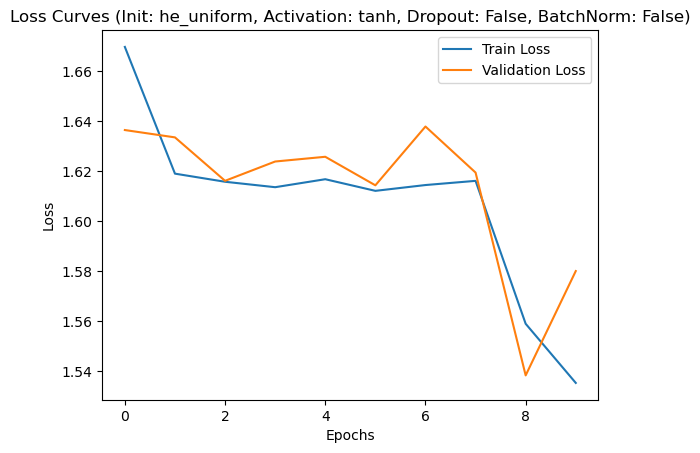

Test Accuracy: 87.83%
Init: he_uniform, Activation: tanh, Dropout: False, BatchNorm: False - Test Accuracy: 87.83%

Training with Init: he_uniform, Activation: tanh, Dropout: False, BatchNorm: True
Epoch [1/10], Train Loss: 1.5879, Val Loss: 1.5163, Train Accuracy: 88.77%, Validation Accuracy: 94.77%
Epoch [2/10], Train Loss: 1.5160, Val Loss: 1.5106, Train Accuracy: 94.81%, Validation Accuracy: 95.18%
Epoch [3/10], Train Loss: 1.5068, Val Loss: 1.5016, Train Accuracy: 95.65%, Validation Accuracy: 96.07%
Epoch [4/10], Train Loss: 1.4988, Val Loss: 1.4985, Train Accuracy: 96.39%, Validation Accuracy: 96.38%
Epoch [5/10], Train Loss: 1.4952, Val Loss: 1.4953, Train Accuracy: 96.68%, Validation Accuracy: 96.68%
Epoch [6/10], Train Loss: 1.4944, Val Loss: 1.4944, Train Accuracy: 96.74%, Validation Accuracy: 96.79%
Epoch [7/10], Train Loss: 1.4908, Val Loss: 1.4946, Train Accuracy: 97.09%, Validation Accuracy: 96.72%
Epoch [8/10], Train Loss: 1.4895, Val Loss: 1.4927, Train Accuracy: 97.25%

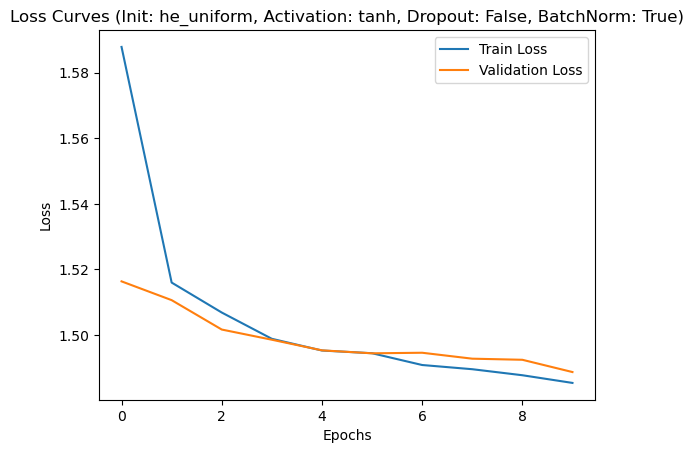

Test Accuracy: 97.06%
Init: he_uniform, Activation: tanh, Dropout: False, BatchNorm: True - Test Accuracy: 97.06%

Training with Init: he_uniform, Activation: tanh, Dropout: True, BatchNorm: False
Epoch [1/10], Train Loss: 2.3038, Val Loss: 2.1288, Train Accuracy: 14.99%, Validation Accuracy: 32.05%
Epoch [2/10], Train Loss: 2.1528, Val Loss: 2.0036, Train Accuracy: 30.48%, Validation Accuracy: 45.68%
Epoch [3/10], Train Loss: 2.0455, Val Loss: 1.9902, Train Accuracy: 41.40%, Validation Accuracy: 47.02%
Epoch [4/10], Train Loss: 2.0147, Val Loss: 1.9797, Train Accuracy: 44.52%, Validation Accuracy: 48.07%
Epoch [5/10], Train Loss: 2.0034, Val Loss: 1.9782, Train Accuracy: 45.71%, Validation Accuracy: 48.24%
Epoch [6/10], Train Loss: 1.9849, Val Loss: 1.9330, Train Accuracy: 47.55%, Validation Accuracy: 52.74%
Epoch [7/10], Train Loss: 1.9671, Val Loss: 1.9069, Train Accuracy: 49.35%, Validation Accuracy: 55.38%
Epoch [8/10], Train Loss: 1.9473, Val Loss: 1.9040, Train Accuracy: 51.33%,

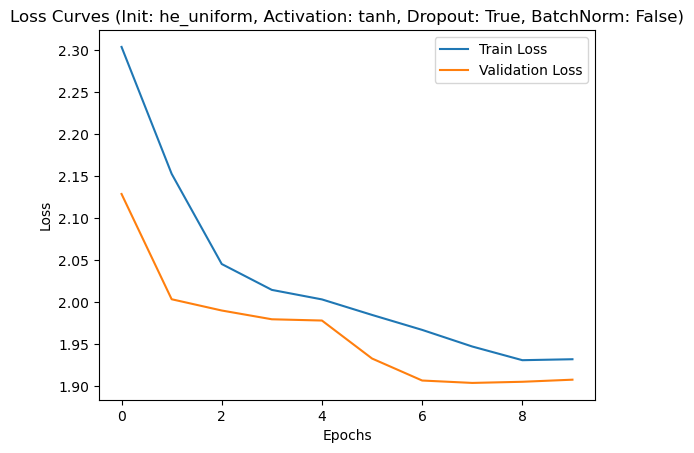

Test Accuracy: 56.05%
Init: he_uniform, Activation: tanh, Dropout: True, BatchNorm: False - Test Accuracy: 56.05%

Training with Init: he_uniform, Activation: tanh, Dropout: True, BatchNorm: True
Epoch [1/10], Train Loss: 2.0479, Val Loss: 1.7278, Train Accuracy: 41.66%, Validation Accuracy: 73.55%
Epoch [2/10], Train Loss: 1.7900, Val Loss: 1.7095, Train Accuracy: 67.87%, Validation Accuracy: 74.88%
Epoch [3/10], Train Loss: 1.7364, Val Loss: 1.6353, Train Accuracy: 73.00%, Validation Accuracy: 82.62%
Epoch [4/10], Train Loss: 1.6841, Val Loss: 1.6014, Train Accuracy: 78.09%, Validation Accuracy: 85.82%
Epoch [5/10], Train Loss: 1.6426, Val Loss: 1.5479, Train Accuracy: 82.43%, Validation Accuracy: 91.38%
Epoch [6/10], Train Loss: 1.6157, Val Loss: 1.5382, Train Accuracy: 84.88%, Validation Accuracy: 92.27%
Epoch [7/10], Train Loss: 1.5992, Val Loss: 1.5318, Train Accuracy: 86.44%, Validation Accuracy: 92.94%
Epoch [8/10], Train Loss: 1.5912, Val Loss: 1.5315, Train Accuracy: 87.24%, 

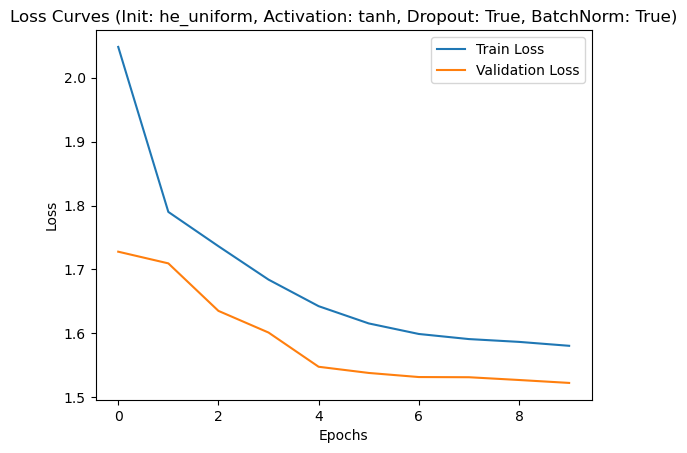

Test Accuracy: 93.68%
Init: he_uniform, Activation: tanh, Dropout: True, BatchNorm: True - Test Accuracy: 93.68%

Training with Init: he_uniform, Activation: relu, Dropout: False, BatchNorm: False
Epoch [1/10], Train Loss: 1.6794, Val Loss: 1.5731, Train Accuracy: 78.22%, Validation Accuracy: 88.85%
Epoch [2/10], Train Loss: 1.5476, Val Loss: 1.5371, Train Accuracy: 91.39%, Validation Accuracy: 92.39%
Epoch [3/10], Train Loss: 1.5364, Val Loss: 1.5641, Train Accuracy: 92.47%, Validation Accuracy: 89.69%
Epoch [4/10], Train Loss: 1.5323, Val Loss: 1.5302, Train Accuracy: 92.84%, Validation Accuracy: 93.09%
Epoch [5/10], Train Loss: 1.5294, Val Loss: 1.5263, Train Accuracy: 93.16%, Validation Accuracy: 93.47%
Epoch [6/10], Train Loss: 1.5306, Val Loss: 1.5437, Train Accuracy: 93.02%, Validation Accuracy: 91.71%
Epoch [7/10], Train Loss: 1.5419, Val Loss: 1.5421, Train Accuracy: 91.90%, Validation Accuracy: 91.88%
Epoch [8/10], Train Loss: 1.5404, Val Loss: 1.5702, Train Accuracy: 92.08%,

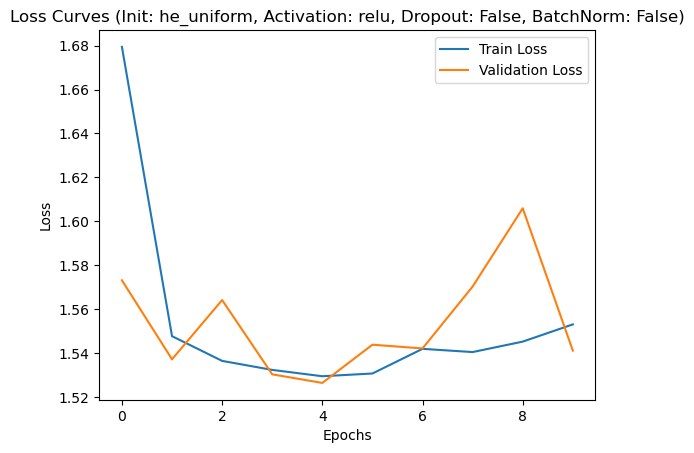

Test Accuracy: 92.08%
Init: he_uniform, Activation: relu, Dropout: False, BatchNorm: False - Test Accuracy: 92.08%

Training with Init: he_uniform, Activation: relu, Dropout: False, BatchNorm: True
Epoch [1/10], Train Loss: 1.5900, Val Loss: 1.5155, Train Accuracy: 88.53%, Validation Accuracy: 94.83%
Epoch [2/10], Train Loss: 1.5152, Val Loss: 1.5063, Train Accuracy: 94.83%, Validation Accuracy: 95.59%
Epoch [3/10], Train Loss: 1.5056, Val Loss: 1.5033, Train Accuracy: 95.71%, Validation Accuracy: 95.91%
Epoch [4/10], Train Loss: 1.4993, Val Loss: 1.5019, Train Accuracy: 96.33%, Validation Accuracy: 96.00%
Epoch [5/10], Train Loss: 1.4955, Val Loss: 1.4971, Train Accuracy: 96.69%, Validation Accuracy: 96.47%
Epoch [6/10], Train Loss: 1.4927, Val Loss: 1.4982, Train Accuracy: 96.94%, Validation Accuracy: 96.38%
Epoch [7/10], Train Loss: 1.4915, Val Loss: 1.4950, Train Accuracy: 97.06%, Validation Accuracy: 96.68%
Epoch [8/10], Train Loss: 1.4890, Val Loss: 1.4924, Train Accuracy: 97.28%

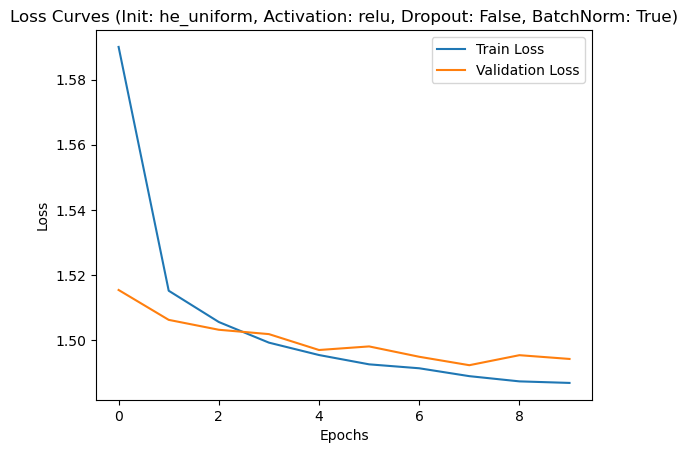

Test Accuracy: 96.74%
Init: he_uniform, Activation: relu, Dropout: False, BatchNorm: True - Test Accuracy: 96.74%

Training with Init: he_uniform, Activation: relu, Dropout: True, BatchNorm: False
Epoch [1/10], Train Loss: 2.3155, Val Loss: 2.2507, Train Accuracy: 13.88%, Validation Accuracy: 20.94%
Epoch [2/10], Train Loss: 2.2421, Val Loss: 2.1756, Train Accuracy: 21.60%, Validation Accuracy: 28.47%
Epoch [3/10], Train Loss: 2.2036, Val Loss: 2.1700, Train Accuracy: 25.59%, Validation Accuracy: 29.07%
Epoch [4/10], Train Loss: 2.1807, Val Loss: 2.1685, Train Accuracy: 27.89%, Validation Accuracy: 29.23%
Epoch [5/10], Train Loss: 2.1717, Val Loss: 2.1145, Train Accuracy: 28.84%, Validation Accuracy: 34.56%
Epoch [6/10], Train Loss: 2.1448, Val Loss: 2.0942, Train Accuracy: 31.58%, Validation Accuracy: 36.66%
Epoch [7/10], Train Loss: 2.1281, Val Loss: 2.0914, Train Accuracy: 33.24%, Validation Accuracy: 36.95%
Epoch [8/10], Train Loss: 2.1060, Val Loss: 2.0316, Train Accuracy: 35.45%,

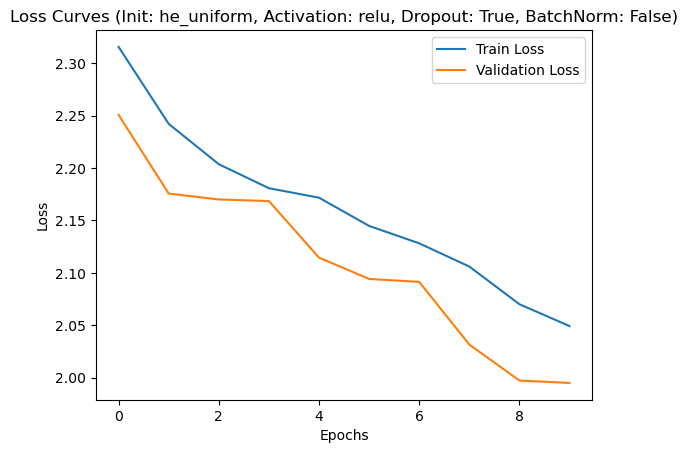

Test Accuracy: 45.75%
Init: he_uniform, Activation: relu, Dropout: True, BatchNorm: False - Test Accuracy: 45.75%

Training with Init: he_uniform, Activation: relu, Dropout: True, BatchNorm: True
Epoch [1/10], Train Loss: 2.0490, Val Loss: 1.7330, Train Accuracy: 41.62%, Validation Accuracy: 73.46%
Epoch [2/10], Train Loss: 1.7840, Val Loss: 1.6477, Train Accuracy: 68.76%, Validation Accuracy: 81.47%
Epoch [3/10], Train Loss: 1.7004, Val Loss: 1.6251, Train Accuracy: 76.84%, Validation Accuracy: 83.53%
Epoch [4/10], Train Loss: 1.6713, Val Loss: 1.6153, Train Accuracy: 79.32%, Validation Accuracy: 84.36%
Epoch [5/10], Train Loss: 1.6540, Val Loss: 1.5630, Train Accuracy: 81.08%, Validation Accuracy: 89.81%
Epoch [6/10], Train Loss: 1.6137, Val Loss: 1.5399, Train Accuracy: 85.12%, Validation Accuracy: 92.18%
Epoch [7/10], Train Loss: 1.6011, Val Loss: 1.5372, Train Accuracy: 86.26%, Validation Accuracy: 92.36%
Epoch [8/10], Train Loss: 1.5917, Val Loss: 1.5314, Train Accuracy: 87.11%, 

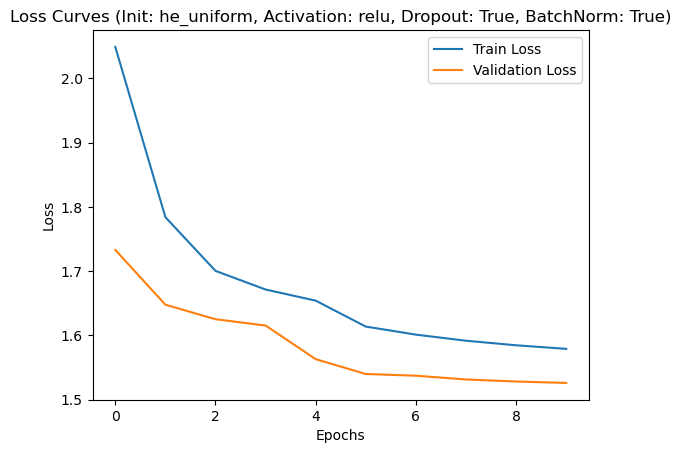

Test Accuracy: 93.28%
Init: he_uniform, Activation: relu, Dropout: True, BatchNorm: True - Test Accuracy: 93.28%

Training with Init: he_normal, Activation: sigmoid, Dropout: False, BatchNorm: False
Epoch [1/10], Train Loss: 1.6651, Val Loss: 1.6157, Train Accuracy: 79.74%, Validation Accuracy: 84.55%
Epoch [2/10], Train Loss: 1.6147, Val Loss: 1.6141, Train Accuracy: 84.58%, Validation Accuracy: 84.66%
Epoch [3/10], Train Loss: 1.6098, Val Loss: 1.6140, Train Accuracy: 85.08%, Validation Accuracy: 84.70%
Epoch [4/10], Train Loss: 1.6069, Val Loss: 1.6096, Train Accuracy: 85.39%, Validation Accuracy: 85.12%
Epoch [5/10], Train Loss: 1.6090, Val Loss: 1.6179, Train Accuracy: 85.20%, Validation Accuracy: 84.28%
Epoch [6/10], Train Loss: 1.6111, Val Loss: 1.6183, Train Accuracy: 84.96%, Validation Accuracy: 84.25%
Epoch [7/10], Train Loss: 1.5799, Val Loss: 1.5750, Train Accuracy: 88.09%, Validation Accuracy: 88.61%
Epoch [8/10], Train Loss: 1.5535, Val Loss: 1.5456, Train Accuracy: 90.75

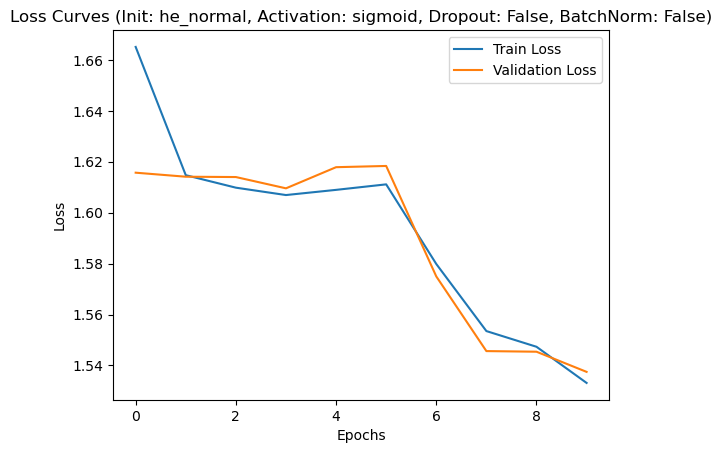

Test Accuracy: 92.17%
Init: he_normal, Activation: sigmoid, Dropout: False, BatchNorm: False - Test Accuracy: 92.17%

Training with Init: he_normal, Activation: sigmoid, Dropout: False, BatchNorm: True
Epoch [1/10], Train Loss: 1.6011, Val Loss: 1.5166, Train Accuracy: 87.36%, Validation Accuracy: 94.75%
Epoch [2/10], Train Loss: 1.5167, Val Loss: 1.5072, Train Accuracy: 94.74%, Validation Accuracy: 95.60%
Epoch [3/10], Train Loss: 1.5073, Val Loss: 1.5018, Train Accuracy: 95.53%, Validation Accuracy: 95.97%
Epoch [4/10], Train Loss: 1.5009, Val Loss: 1.5023, Train Accuracy: 96.15%, Validation Accuracy: 95.97%
Epoch [5/10], Train Loss: 1.4967, Val Loss: 1.4964, Train Accuracy: 96.58%, Validation Accuracy: 96.58%
Epoch [6/10], Train Loss: 1.4930, Val Loss: 1.4936, Train Accuracy: 96.91%, Validation Accuracy: 96.83%
Epoch [7/10], Train Loss: 1.4914, Val Loss: 1.4967, Train Accuracy: 97.04%, Validation Accuracy: 96.53%
Epoch [8/10], Train Loss: 1.4905, Val Loss: 1.4968, Train Accuracy: 97

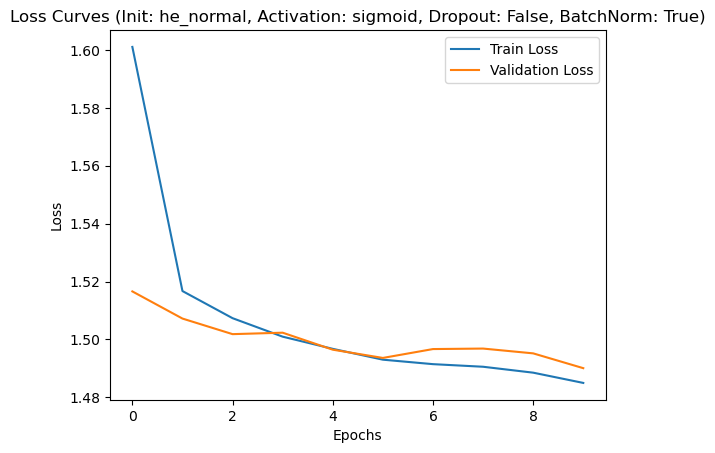

Test Accuracy: 96.92%
Init: he_normal, Activation: sigmoid, Dropout: False, BatchNorm: True - Test Accuracy: 96.92%

Training with Init: he_normal, Activation: sigmoid, Dropout: True, BatchNorm: False
Epoch [1/10], Train Loss: 2.2807, Val Loss: 2.1698, Train Accuracy: 17.62%, Validation Accuracy: 29.04%
Epoch [2/10], Train Loss: 2.1993, Val Loss: 2.1599, Train Accuracy: 26.02%, Validation Accuracy: 30.09%
Epoch [3/10], Train Loss: 2.1700, Val Loss: 2.1562, Train Accuracy: 29.04%, Validation Accuracy: 30.47%
Epoch [4/10], Train Loss: 2.1628, Val Loss: 2.1182, Train Accuracy: 29.79%, Validation Accuracy: 34.27%
Epoch [5/10], Train Loss: 2.1561, Val Loss: 2.1423, Train Accuracy: 30.48%, Validation Accuracy: 31.87%
Epoch [6/10], Train Loss: 2.1636, Val Loss: 2.1513, Train Accuracy: 29.71%, Validation Accuracy: 30.97%
Epoch [7/10], Train Loss: 2.1664, Val Loss: 2.1400, Train Accuracy: 29.46%, Validation Accuracy: 32.12%
Epoch [8/10], Train Loss: 2.1491, Val Loss: 2.1347, Train Accuracy: 31.

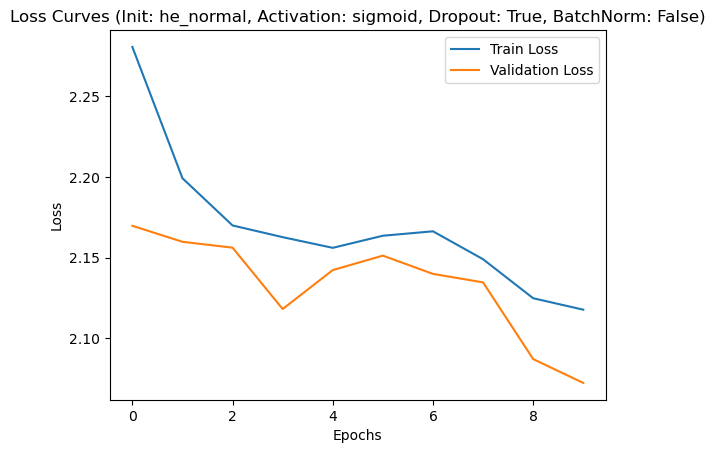

Test Accuracy: 38.88%
Init: he_normal, Activation: sigmoid, Dropout: True, BatchNorm: False - Test Accuracy: 38.88%

Training with Init: he_normal, Activation: sigmoid, Dropout: True, BatchNorm: True
Epoch [1/10], Train Loss: 2.0675, Val Loss: 1.7624, Train Accuracy: 39.21%, Validation Accuracy: 69.75%
Epoch [2/10], Train Loss: 1.7800, Val Loss: 1.6458, Train Accuracy: 69.18%, Validation Accuracy: 81.85%
Epoch [3/10], Train Loss: 1.7078, Val Loss: 1.6252, Train Accuracy: 76.08%, Validation Accuracy: 83.50%
Epoch [4/10], Train Loss: 1.6825, Val Loss: 1.6080, Train Accuracy: 78.29%, Validation Accuracy: 85.07%
Epoch [5/10], Train Loss: 1.6504, Val Loss: 1.5523, Train Accuracy: 81.56%, Validation Accuracy: 90.83%
Epoch [6/10], Train Loss: 1.6236, Val Loss: 1.5417, Train Accuracy: 84.05%, Validation Accuracy: 91.89%
Epoch [7/10], Train Loss: 1.6071, Val Loss: 1.5392, Train Accuracy: 85.64%, Validation Accuracy: 92.17%
Epoch [8/10], Train Loss: 1.5987, Val Loss: 1.5320, Train Accuracy: 86.3

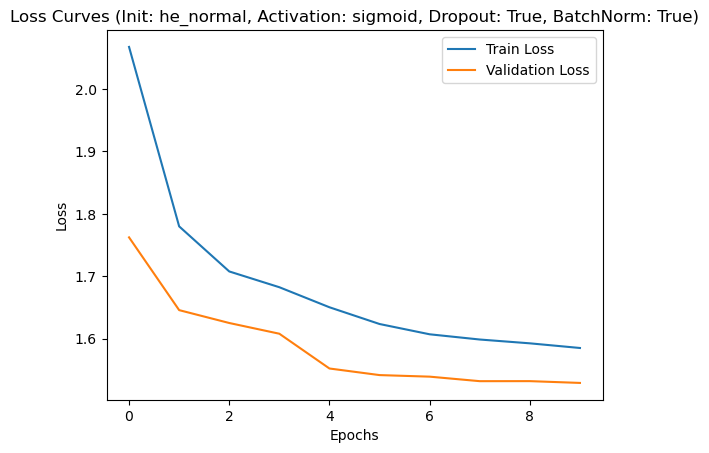

Test Accuracy: 93.20%
Init: he_normal, Activation: sigmoid, Dropout: True, BatchNorm: True - Test Accuracy: 93.20%

Training with Init: he_normal, Activation: tanh, Dropout: False, BatchNorm: False
Epoch [1/10], Train Loss: 1.6969, Val Loss: 1.6229, Train Accuracy: 76.38%, Validation Accuracy: 83.77%
Epoch [2/10], Train Loss: 1.5890, Val Loss: 1.5571, Train Accuracy: 87.17%, Validation Accuracy: 90.38%
Epoch [3/10], Train Loss: 1.5374, Val Loss: 1.5305, Train Accuracy: 92.34%, Validation Accuracy: 93.08%
Epoch [4/10], Train Loss: 1.5289, Val Loss: 1.5423, Train Accuracy: 93.17%, Validation Accuracy: 91.88%
Epoch [5/10], Train Loss: 1.5321, Val Loss: 1.5316, Train Accuracy: 92.91%, Validation Accuracy: 92.97%
Epoch [6/10], Train Loss: 1.5337, Val Loss: 1.5410, Train Accuracy: 92.74%, Validation Accuracy: 92.00%
Epoch [7/10], Train Loss: 1.5305, Val Loss: 1.5624, Train Accuracy: 93.06%, Validation Accuracy: 89.83%
Epoch [8/10], Train Loss: 1.5367, Val Loss: 1.5609, Train Accuracy: 92.41%

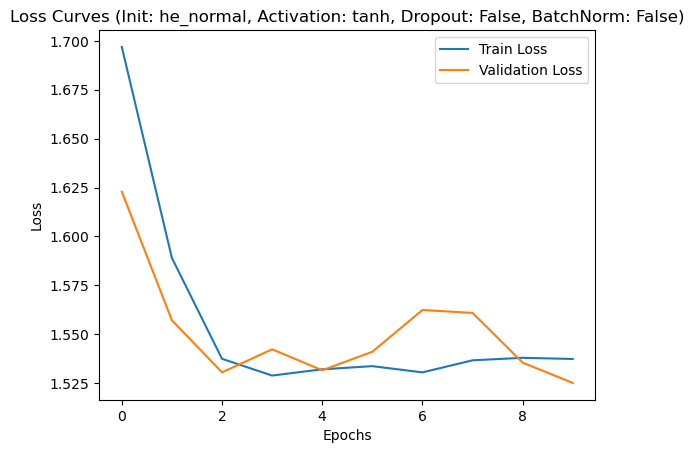

Test Accuracy: 93.41%
Init: he_normal, Activation: tanh, Dropout: False, BatchNorm: False - Test Accuracy: 93.41%

Training with Init: he_normal, Activation: tanh, Dropout: False, BatchNorm: True
Epoch [1/10], Train Loss: 1.5873, Val Loss: 1.5150, Train Accuracy: 88.81%, Validation Accuracy: 94.92%
Epoch [2/10], Train Loss: 1.5154, Val Loss: 1.5087, Train Accuracy: 94.85%, Validation Accuracy: 95.38%
Epoch [3/10], Train Loss: 1.5075, Val Loss: 1.5015, Train Accuracy: 95.59%, Validation Accuracy: 96.03%
Epoch [4/10], Train Loss: 1.5008, Val Loss: 1.4974, Train Accuracy: 96.17%, Validation Accuracy: 96.48%
Epoch [5/10], Train Loss: 1.4962, Val Loss: 1.4991, Train Accuracy: 96.62%, Validation Accuracy: 96.28%
Epoch [6/10], Train Loss: 1.4939, Val Loss: 1.4929, Train Accuracy: 96.86%, Validation Accuracy: 96.83%
Epoch [7/10], Train Loss: 1.4906, Val Loss: 1.4943, Train Accuracy: 97.14%, Validation Accuracy: 96.74%
Epoch [8/10], Train Loss: 1.4905, Val Loss: 1.4912, Train Accuracy: 97.11%, 

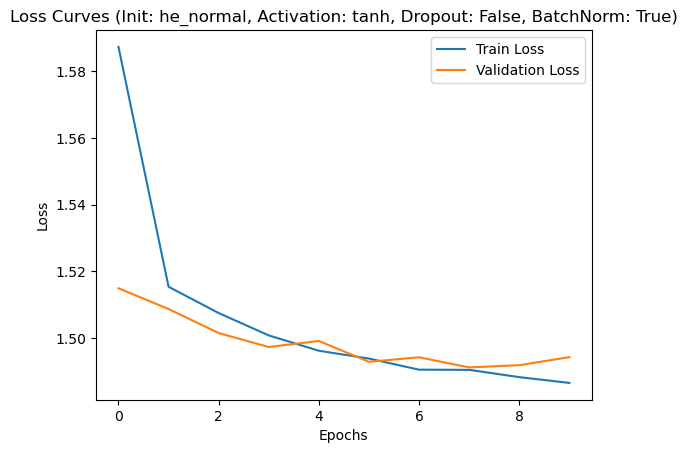

Test Accuracy: 96.53%
Init: he_normal, Activation: tanh, Dropout: False, BatchNorm: True - Test Accuracy: 96.53%

Training with Init: he_normal, Activation: tanh, Dropout: True, BatchNorm: False
Epoch [1/10], Train Loss: 2.3506, Val Loss: 2.2735, Train Accuracy: 10.39%, Validation Accuracy: 18.48%
Epoch [2/10], Train Loss: 2.2994, Val Loss: 2.2707, Train Accuracy: 16.04%, Validation Accuracy: 19.00%
Epoch [3/10], Train Loss: 2.2592, Val Loss: 2.2000, Train Accuracy: 20.12%, Validation Accuracy: 26.02%
Epoch [4/10], Train Loss: 2.2276, Val Loss: 2.1805, Train Accuracy: 23.29%, Validation Accuracy: 28.02%
Epoch [5/10], Train Loss: 2.1971, Val Loss: 2.1604, Train Accuracy: 26.32%, Validation Accuracy: 30.00%
Epoch [6/10], Train Loss: 2.1778, Val Loss: 2.1307, Train Accuracy: 28.26%, Validation Accuracy: 33.02%
Epoch [7/10], Train Loss: 2.1705, Val Loss: 2.0819, Train Accuracy: 29.02%, Validation Accuracy: 37.88%
Epoch [8/10], Train Loss: 2.1319, Val Loss: 2.0727, Train Accuracy: 32.89%, V

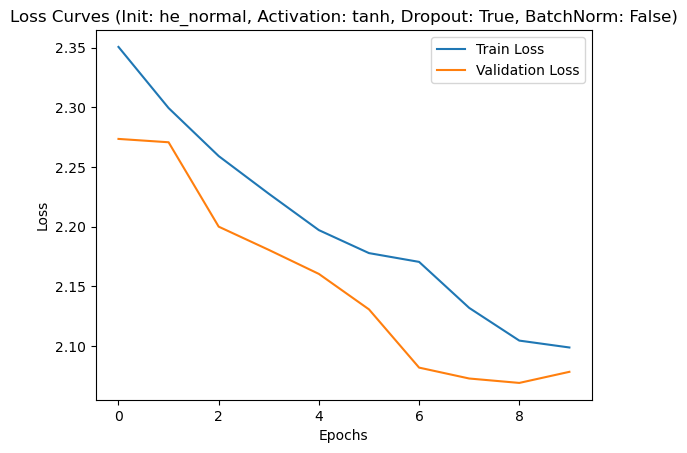

Test Accuracy: 38.01%
Init: he_normal, Activation: tanh, Dropout: True, BatchNorm: False - Test Accuracy: 38.01%

Training with Init: he_normal, Activation: tanh, Dropout: True, BatchNorm: True
Epoch [1/10], Train Loss: 2.0660, Val Loss: 1.7373, Train Accuracy: 39.86%, Validation Accuracy: 72.46%
Epoch [2/10], Train Loss: 1.7962, Val Loss: 1.7112, Train Accuracy: 67.31%, Validation Accuracy: 74.83%
Epoch [3/10], Train Loss: 1.7531, Val Loss: 1.6666, Train Accuracy: 71.19%, Validation Accuracy: 79.33%
Epoch [4/10], Train Loss: 1.6890, Val Loss: 1.5578, Train Accuracy: 77.88%, Validation Accuracy: 90.60%
Epoch [5/10], Train Loss: 1.6395, Val Loss: 1.5428, Train Accuracy: 82.74%, Validation Accuracy: 91.83%
Epoch [6/10], Train Loss: 1.6131, Val Loss: 1.5353, Train Accuracy: 85.12%, Validation Accuracy: 92.55%
Epoch [7/10], Train Loss: 1.6011, Val Loss: 1.5317, Train Accuracy: 86.24%, Validation Accuracy: 92.89%
Epoch [8/10], Train Loss: 1.5960, Val Loss: 1.5284, Train Accuracy: 86.67%, Va

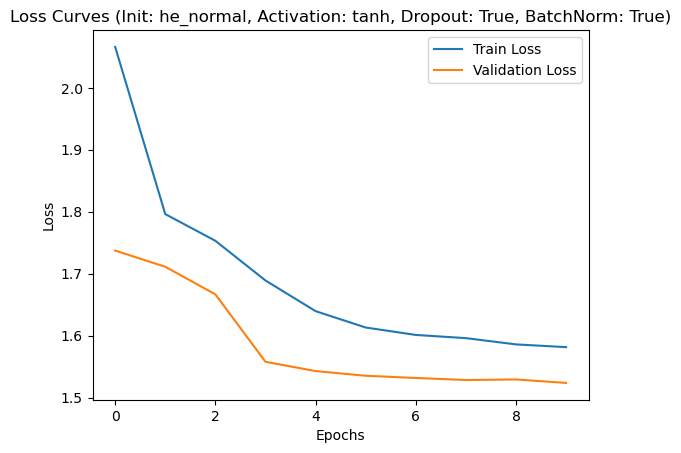

Test Accuracy: 93.44%
Init: he_normal, Activation: tanh, Dropout: True, BatchNorm: True - Test Accuracy: 93.44%

Training with Init: he_normal, Activation: relu, Dropout: False, BatchNorm: False
Epoch [1/10], Train Loss: 1.6123, Val Loss: 1.5582, Train Accuracy: 85.04%, Validation Accuracy: 90.26%
Epoch [2/10], Train Loss: 1.5427, Val Loss: 1.5365, Train Accuracy: 91.82%, Validation Accuracy: 92.45%
Epoch [3/10], Train Loss: 1.5381, Val Loss: 1.5293, Train Accuracy: 92.26%, Validation Accuracy: 93.19%
Epoch [4/10], Train Loss: 1.5360, Val Loss: 1.5324, Train Accuracy: 92.51%, Validation Accuracy: 92.84%
Epoch [5/10], Train Loss: 1.5342, Val Loss: 1.5242, Train Accuracy: 92.70%, Validation Accuracy: 93.69%
Epoch [6/10], Train Loss: 1.5331, Val Loss: 1.5278, Train Accuracy: 92.78%, Validation Accuracy: 93.32%
Epoch [7/10], Train Loss: 1.5351, Val Loss: 1.5662, Train Accuracy: 92.59%, Validation Accuracy: 89.43%
Epoch [8/10], Train Loss: 1.5388, Val Loss: 1.5313, Train Accuracy: 92.21%, V

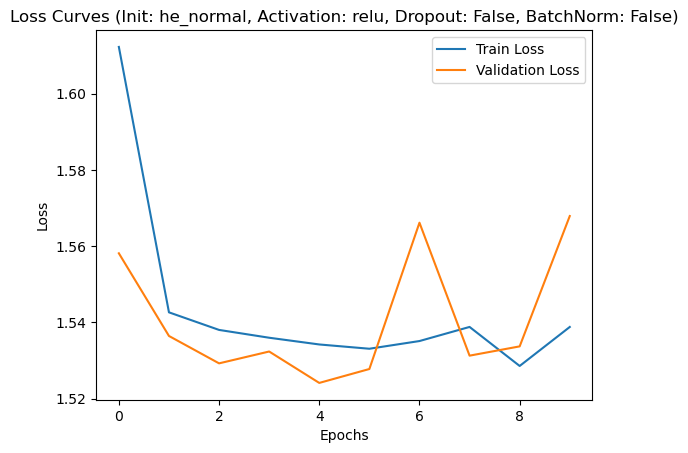

Test Accuracy: 89.49%
Init: he_normal, Activation: relu, Dropout: False, BatchNorm: False - Test Accuracy: 89.49%

Training with Init: he_normal, Activation: relu, Dropout: False, BatchNorm: True
Epoch [1/10], Train Loss: 1.5881, Val Loss: 1.5154, Train Accuracy: 88.87%, Validation Accuracy: 94.88%
Epoch [2/10], Train Loss: 1.5160, Val Loss: 1.5035, Train Accuracy: 94.81%, Validation Accuracy: 95.91%
Epoch [3/10], Train Loss: 1.5050, Val Loss: 1.5058, Train Accuracy: 95.79%, Validation Accuracy: 95.71%
Epoch [4/10], Train Loss: 1.5020, Val Loss: 1.5029, Train Accuracy: 96.11%, Validation Accuracy: 96.01%
Epoch [5/10], Train Loss: 1.4961, Val Loss: 1.5014, Train Accuracy: 96.61%, Validation Accuracy: 96.09%
Epoch [6/10], Train Loss: 1.4931, Val Loss: 1.4940, Train Accuracy: 96.91%, Validation Accuracy: 96.78%
Epoch [7/10], Train Loss: 1.4904, Val Loss: 1.4944, Train Accuracy: 97.17%, Validation Accuracy: 96.80%
Epoch [8/10], Train Loss: 1.4899, Val Loss: 1.4943, Train Accuracy: 97.21%, 

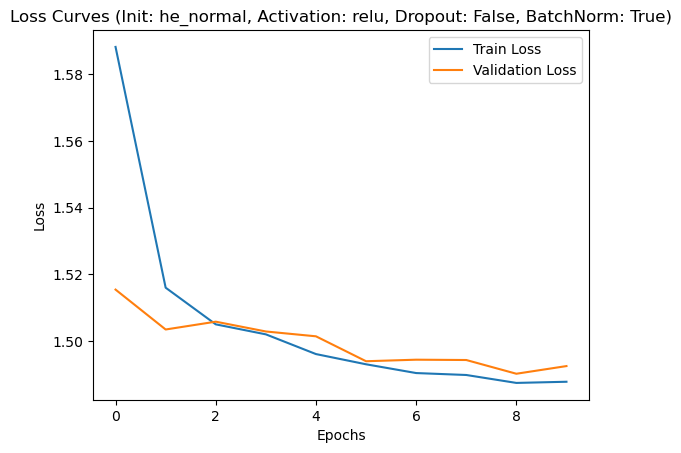

Test Accuracy: 96.70%
Init: he_normal, Activation: relu, Dropout: False, BatchNorm: True - Test Accuracy: 96.70%

Training with Init: he_normal, Activation: relu, Dropout: True, BatchNorm: False
Epoch [1/10], Train Loss: 2.3077, Val Loss: 2.1904, Train Accuracy: 14.76%, Validation Accuracy: 26.77%
Epoch [2/10], Train Loss: 2.2108, Val Loss: 2.0693, Train Accuracy: 24.86%, Validation Accuracy: 39.11%
Epoch [3/10], Train Loss: 2.1243, Val Loss: 2.0666, Train Accuracy: 33.57%, Validation Accuracy: 39.46%
Epoch [4/10], Train Loss: 2.0918, Val Loss: 2.0605, Train Accuracy: 36.86%, Validation Accuracy: 40.05%
Epoch [5/10], Train Loss: 2.0813, Val Loss: 2.0461, Train Accuracy: 37.89%, Validation Accuracy: 41.48%
Epoch [6/10], Train Loss: 2.0733, Val Loss: 2.0647, Train Accuracy: 38.71%, Validation Accuracy: 39.63%
Epoch [7/10], Train Loss: 2.0622, Val Loss: 2.0091, Train Accuracy: 39.84%, Validation Accuracy: 45.20%
Epoch [8/10], Train Loss: 2.0394, Val Loss: 1.9899, Train Accuracy: 42.11%, V

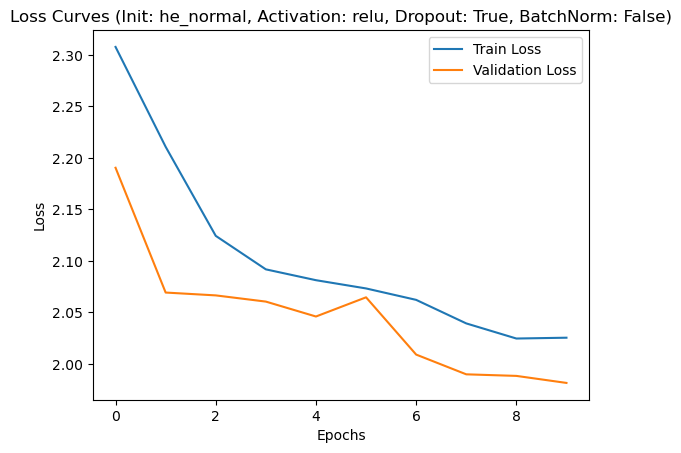

Test Accuracy: 47.95%
Init: he_normal, Activation: relu, Dropout: True, BatchNorm: False - Test Accuracy: 47.95%

Training with Init: he_normal, Activation: relu, Dropout: True, BatchNorm: True
Epoch [1/10], Train Loss: 2.0738, Val Loss: 1.7702, Train Accuracy: 38.46%, Validation Accuracy: 69.46%
Epoch [2/10], Train Loss: 1.7802, Val Loss: 1.6329, Train Accuracy: 69.53%, Validation Accuracy: 82.60%
Epoch [3/10], Train Loss: 1.6970, Val Loss: 1.6204, Train Accuracy: 77.03%, Validation Accuracy: 83.83%
Epoch [4/10], Train Loss: 1.6671, Val Loss: 1.5656, Train Accuracy: 79.89%, Validation Accuracy: 89.67%
Epoch [5/10], Train Loss: 1.6320, Val Loss: 1.5468, Train Accuracy: 83.41%, Validation Accuracy: 91.42%
Epoch [6/10], Train Loss: 1.6115, Val Loss: 1.5384, Train Accuracy: 85.34%, Validation Accuracy: 92.22%
Epoch [7/10], Train Loss: 1.6000, Val Loss: 1.5359, Train Accuracy: 86.37%, Validation Accuracy: 92.47%
Epoch [8/10], Train Loss: 1.5923, Val Loss: 1.5312, Train Accuracy: 87.12%, Va

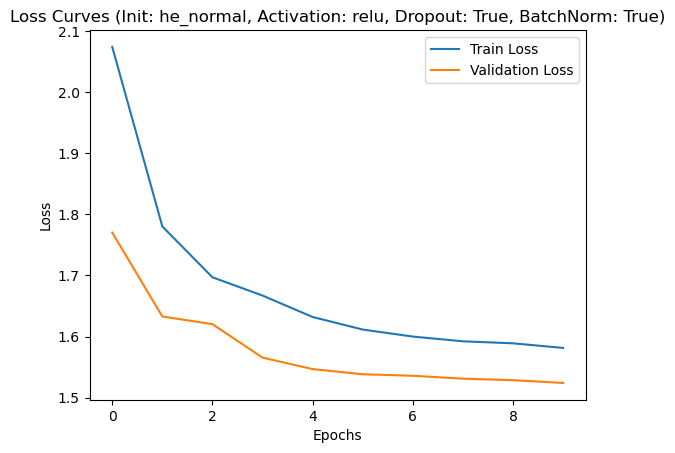

Test Accuracy: 93.44%
Init: he_normal, Activation: relu, Dropout: True, BatchNorm: True - Test Accuracy: 93.44%


In [17]:
# Hyperparameters and configurations (rest remains the same)
input_size = 784  # 28x28 images
hidden_size = 128
output_size = 10  # 10 classes (digits 0-9)
num_epochs = 10
learning_rate = 0.001

# Initialize criterion
criterion = nn.CrossEntropyLoss()

# Configurations for experiments
init_types = ['xavier_uniform', 'xavier_normal', 'he_uniform', 'he_normal']
activations = ['sigmoid', 'tanh', 'relu']
use_dropout_options = [False, True]
use_batch_norm_options = [False, True]

# Store losses and accuracies for all configurations
all_train_losses = {}
all_val_losses = {}
all_test_accuracies = {}

# Initialize TensorBoard writer
writer = SummaryWriter('runs/experiment')

for init_type in init_types:
    for activation in activations:
        for use_dropout in use_dropout_options:
            for use_batch_norm in use_batch_norm_options:
                config_name = f"Init: {init_type}, Activation: {activation}, Dropout: {use_dropout}, BatchNorm: {use_batch_norm}"
                
                # Sanitize the config_name to remove problematic characters for directories
                sanitized_config_name = config_name.replace(", ", "_").replace(" ", "_").replace(":", "").replace("/", "_")

                print(f'\nTraining with {config_name}')

                # Initialize model with the current configuration
                model = NeuralNet(input_size, hidden_size, output_size,
                                  init_type=init_type, use_dropout=use_dropout,
                                  dropout_prob=0.5, use_batch_norm=use_batch_norm)
                model.to(device)
                optimizer = optim.Adam(model.parameters(), lr=learning_rate)

                # Train and validate the model
                train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs)

                # Store train and val losses
                all_train_losses[config_name] = train_losses
                all_val_losses[config_name] = val_losses

                # Log the losses to TensorBoard
                for epoch in range(num_epochs):
                    writer.add_scalars(f'{sanitized_config_name}/Losses', {
                        'Train Loss': train_losses[epoch],
                        'Validation Loss': val_losses[epoch]
                    }, epoch)

                # Plot the loss curves (optional for visual inspection)
                plt.plot(train_losses, label='Train Loss')
                plt.plot(val_losses, label='Validation Loss')
                plt.title(f'Loss Curves ({config_name})')
                plt.xlabel('Epochs')
                plt.ylabel('Loss')
                plt.legend()
                plt.show()

                # Evaluate on the test set
                test_accuracy = evaluate_model(model, test_loader)
                all_test_accuracies[config_name] = test_accuracy
                print(f'{config_name} - Test Accuracy: {test_accuracy:.2f}%')

                # Log the test accuracy to TensorBoard
                writer.add_scalar(f'{sanitized_config_name}/Test Accuracy', test_accuracy)

# Close the writer when done
writer.close()

### Top 5 Models respect to test accuracy with their Loss Curves

Top 5 Models by Test Accuracy with Loss Curves:

1. Init: he_uniform, Activation: tanh, Dropout: False, BatchNorm: True - Test Accuracy: 97.06%


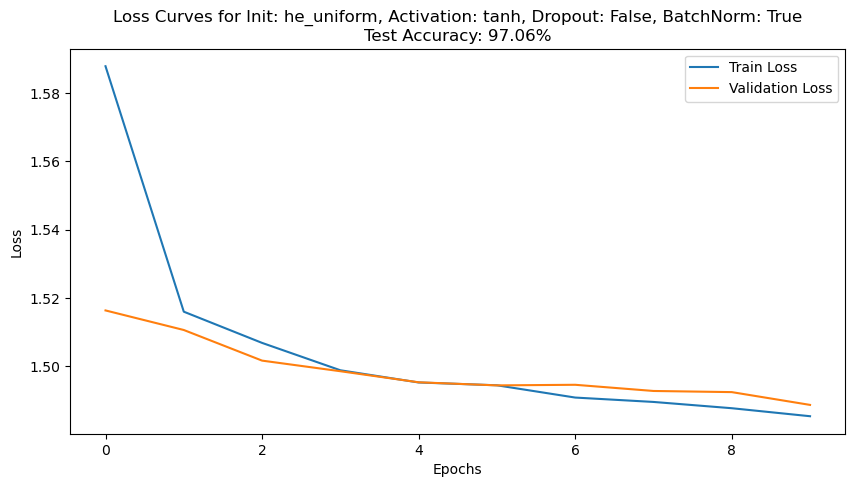


2. Init: xavier_uniform, Activation: relu, Dropout: False, BatchNorm: True - Test Accuracy: 97.05%


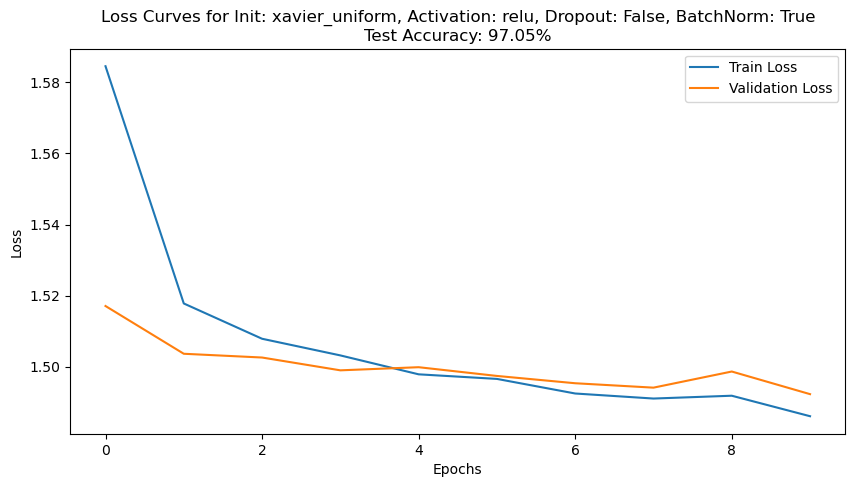


3. Init: xavier_normal, Activation: relu, Dropout: False, BatchNorm: True - Test Accuracy: 96.99%


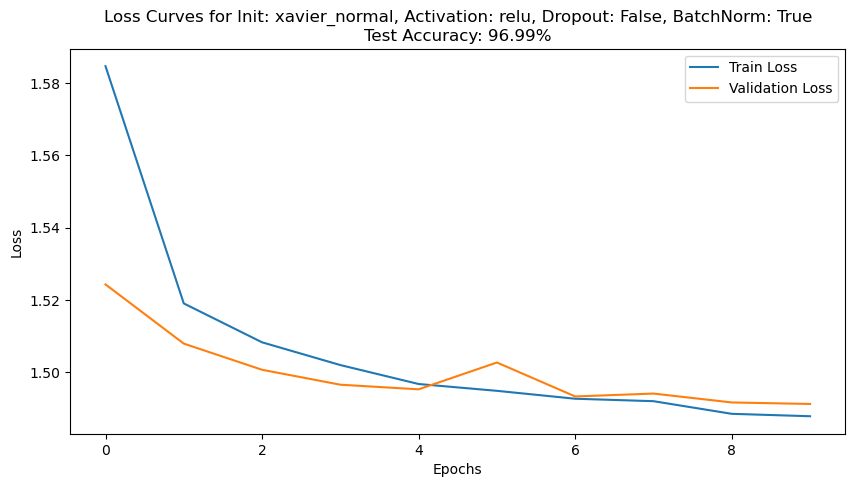


4. Init: xavier_uniform, Activation: tanh, Dropout: False, BatchNorm: True - Test Accuracy: 96.97%


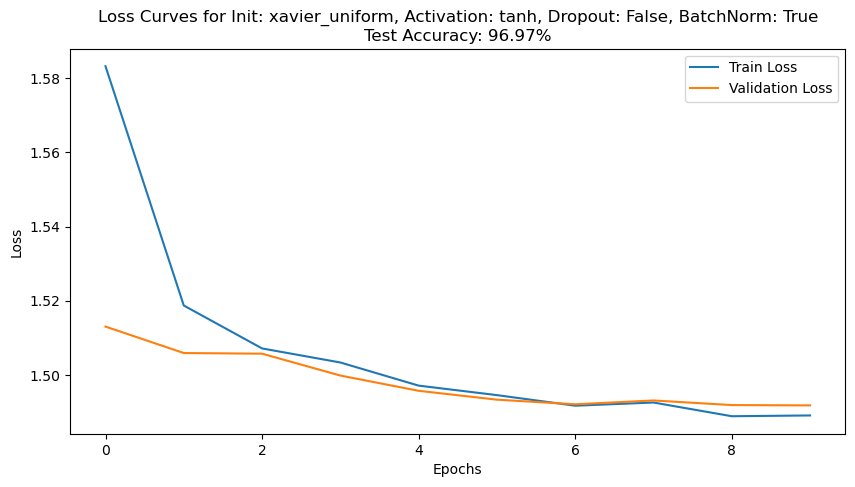


5. Init: he_normal, Activation: sigmoid, Dropout: False, BatchNorm: True - Test Accuracy: 96.92%


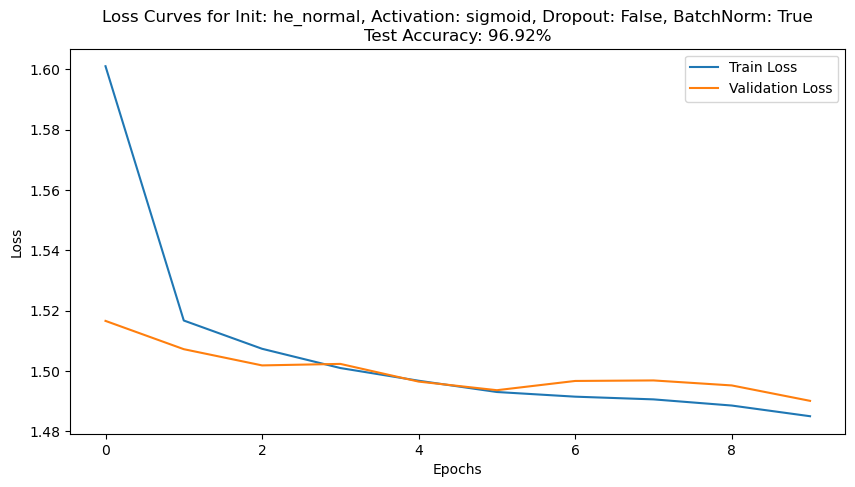

In [24]:
# Sort configurations by test accuracy in descending order
sorted_accuracies = sorted(all_test_accuracies.items(), key=lambda x: x[1], reverse=True)

# Display and plot the top 5 configurations with the highest test accuracy
print("Top 5 Models by Test Accuracy with Loss Curves:")

for i, (config_name, accuracy) in enumerate(sorted_accuracies[:5], 1):
    print(f"\n{i}. {config_name} - Test Accuracy: {accuracy:.2f}%")

    # Retrieve the train and validation losses for this configuration
    train_losses = all_train_losses[config_name]
    val_losses = all_val_losses[config_name]

    # Plot the loss curves
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(f"Loss Curves for {config_name}\nTest Accuracy: {accuracy:.2f}%")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

### The Maximum test accuracy was 97.06 with the following Hyperparameters:¶

Init: he_uniform

Activation: tanh

Dropout: False

BatchNorm: True

#### Insights:

Batch Normalization: All top models use Batch Normalization, which suggests it is essential for stabilizing training and improving model accuracy. It helps normalize the inputs to each layer, reducing internal covariate shift, accelerating convergence, and making the model more robust.

Initialization Techniques: All perform similarly

Dropout: Dropout was not required in any of the top-performing models, suggesting that the Batch Normalization and careful initialization techniques were sufficient to prevent overfitting. This indicates that for these configurations, regularization through dropout was unnecessary.

Activation Functions: The combination of sigmoid or tanh with He initialization and Batch Normalization results in the highest accuracy. These activation functions, when paired with proper initialization and normalization, provide strong performance, highlighting the importance of matching activation, initialization, and normalization techniques for optimal accuracy.